# Read in data files


In [3]:
import os
import pandas as pd
from pathlib import Path
from collections import defaultdict


def extract_set_and_slide_numbers(filename):
    filename = filename.split(".")[0]
    set_number = filename.split("_")[1]
    slide_number = filename.split("_")[3]
    return int(set_number), int(slide_number)


# Define the directory path
slidefiles_dir = Path("SlideFiles")

# List all files in the directory
csv_files = os.listdir(slidefiles_dir)

dfs = defaultdict(dict)
for csv_file in csv_files:
    file_path = slidefiles_dir / csv_file
    set_number, slide_number = extract_set_and_slide_numbers(csv_file)
    dfs[set_number][slide_number] = pd.read_csv(file_path)


assert len(dfs) == 11
for set_number, slides in dfs.items():
    assert len(slides) == 3

# Define some constants


In [4]:
temp_df = dfs[1][1]
# Define metadata columns
METADATA_COLS = ["type", "row", "col", "well", "set", "type.f", "slide"]

# Get feature columns (all columns except metadata)
FEATURE_COLS = [col for col in temp_df.columns if col not in METADATA_COLS]

TREATMENTS = set(["gene"])
CONTROLS = set(temp_df["type"]) - TREATMENTS
print(f"Unique types: {set(temp_df['type'])}")  # Unique types
print(f"Treatments: {TREATMENTS}")
print(f"Controls: {CONTROLS}")


Unique types: {'gene', 'rf', 'fit1', 'rfnotDL', 'bscl2'}
Treatments: {'gene'}
Controls: {'rfnotDL', 'fit1', 'rf', 'bscl2'}


# Exploring the 7 replicates per well


In [5]:
# Focus on set 1, slide 1
df = dfs[1][1]

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X128,X129,X130,type,row,col,well,set,type.f,slide
0,0.058703,0.047442,296.564961,2.814302,5.219064,7.471565,0.176484,59.023471,259.954936,13.851270,...,32.349785,0.001218,0.729399,fit1,1,1,1,1,2,1
1,0.053762,0.039319,310.125153,3.249970,5.567017,8.128290,0.224600,70.349711,254.304048,11.704548,...,34.808786,0.001170,0.726783,fit1,1,1,1,1,2,1
2,0.063482,0.054567,404.721265,2.802875,5.065489,7.240840,0.229282,68.810549,239.147256,9.801566,...,30.347390,0.001360,0.734110,fit1,1,1,1,1,2,1
3,0.061266,0.052233,360.742694,3.117612,5.604749,7.844487,0.155879,68.755236,234.285714,7.991611,...,35.177296,0.001484,0.745590,fit1,1,1,1,1,2,1
4,0.057151,0.047473,328.880636,2.800955,5.359986,7.431968,0.205421,60.054356,267.952962,14.757158,...,35.026132,0.001179,0.724277,fit1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0.055275,0.045984,305.951064,3.247584,5.544358,7.645723,0.212455,49.306359,281.176656,13.236819,...,35.735016,0.000781,0.735027,rfnotDL,16,24,384,1,5,1
2684,0.071592,0.069190,340.523002,2.045282,4.521523,5.095960,0.087170,31.489742,295.214876,8.974367,...,28.305785,0.000412,0.771710,rfnotDL,16,24,384,1,5,1
2685,0.063067,0.050438,401.857171,3.408687,5.923905,7.830701,0.038120,46.396356,244.007752,13.942194,...,41.697674,0.000581,0.723569,rfnotDL,16,24,384,1,5,1
2686,0.060887,0.055064,323.577370,2.451005,4.938098,6.392121,0.088102,45.164888,304.913151,9.266393,...,31.734491,0.000599,0.737688,rfnotDL,16,24,384,1,5,1


,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.058271,0.058703,0.004390,7.534517,0.051608,0.063482,0.011874
X2,0.047774,0.047473,0.005546,11.609049,0.039319,0.054567,0.015248
X3,349.815349,339.405263,43.795480,12.519599,296.564961,408.267470,111.702509
X4,2.942719,2.814302,0.235051,7.987538,2.634854,3.249970,0.615116
X5,5.352429,5.359986,0.193699,3.618898,5.065489,5.604749,0.539261
...,...,...,...,...,...,...,...
X126,0.052700,0.051998,0.004681,8.882010,0.046833,0.059716,0.012883
X127,9.201940,9.958309,3.318782,36.066119,5.227531,12.766425,7.538893
X128,33.610881,34.215859,1.759066,5.233622,30.347390,35.177296,4.829906
X129,0.001286,0.001218,0.000133,10.336089,0.001169,0.001484,0.000314


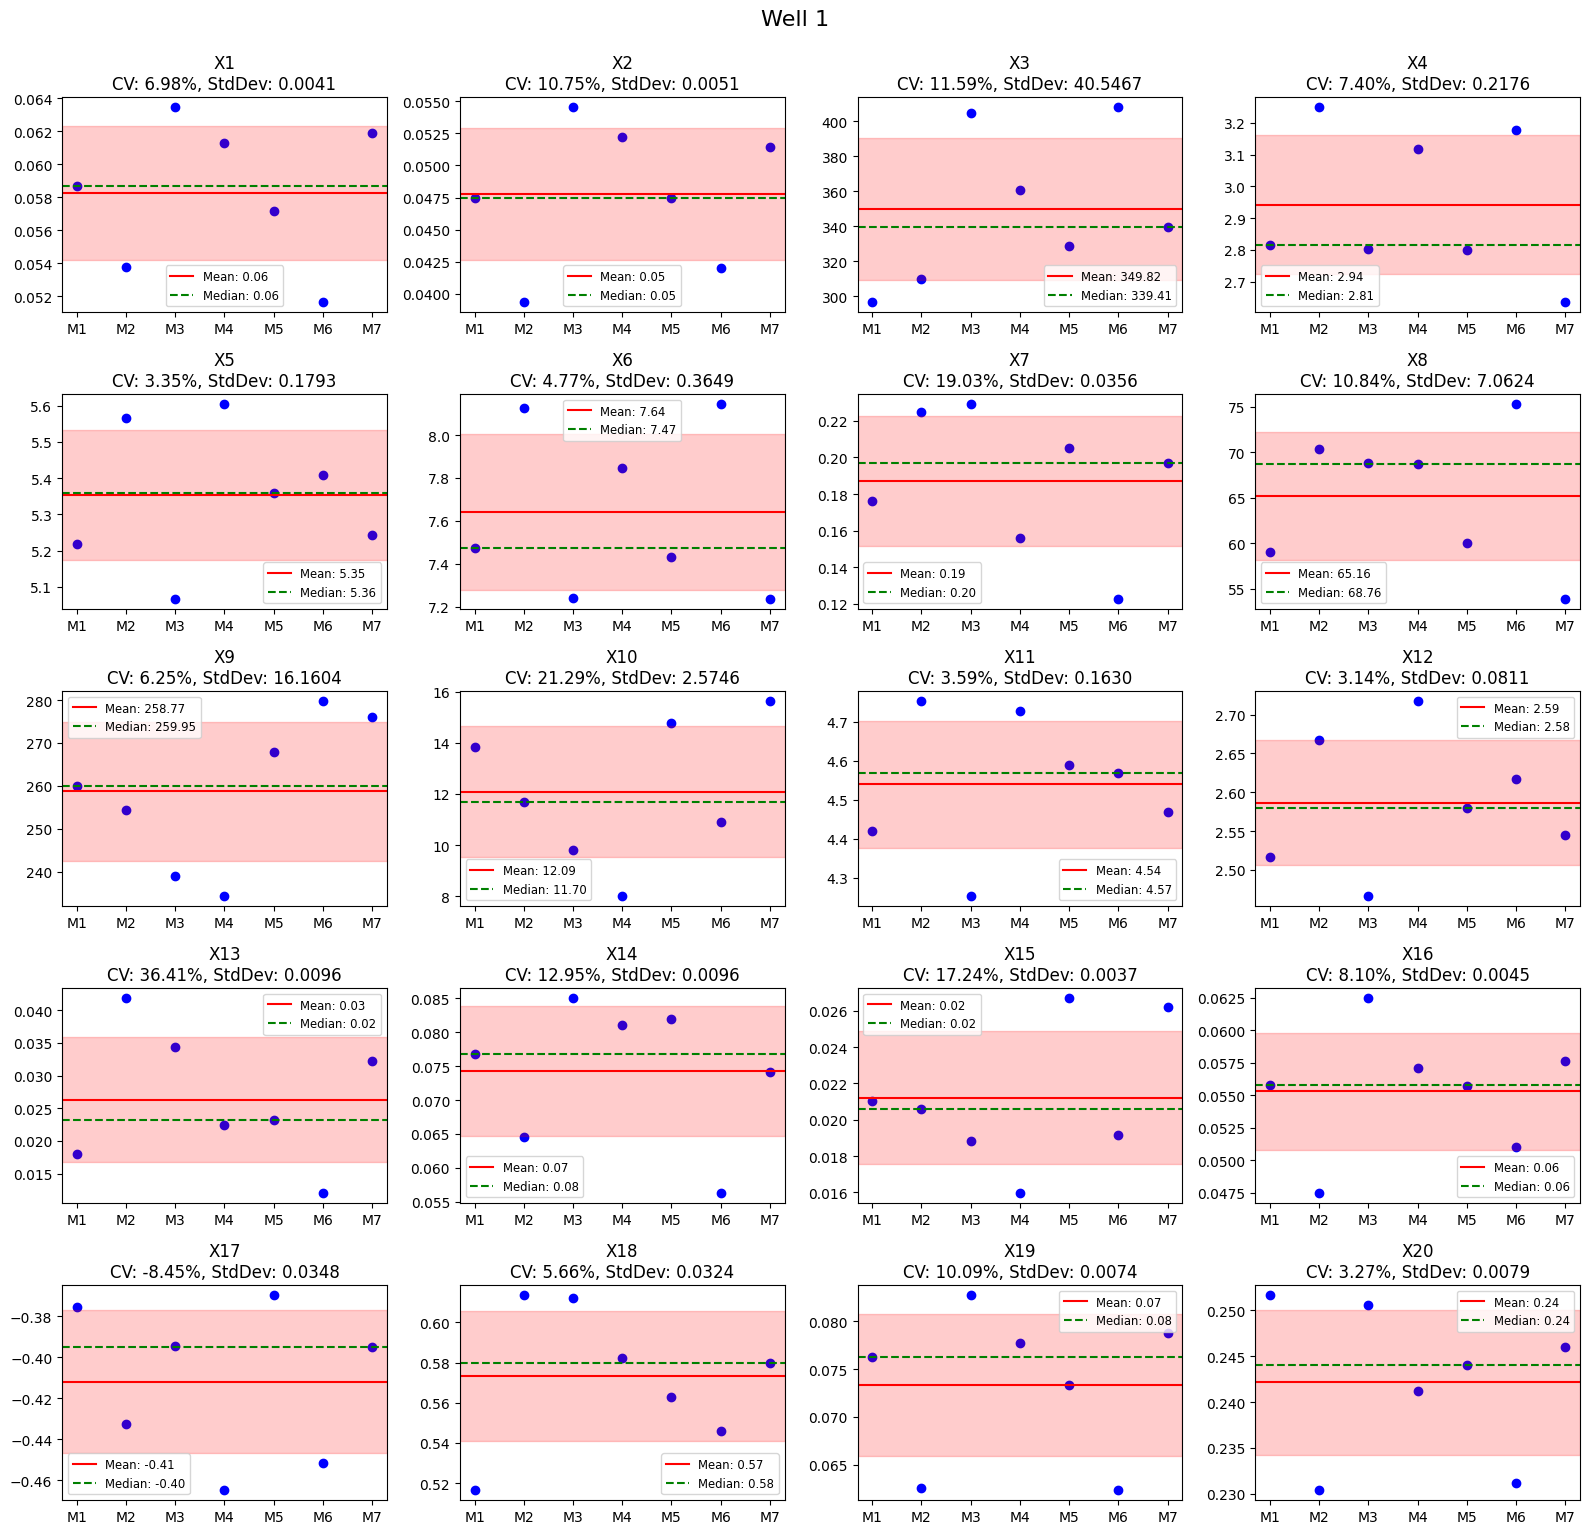

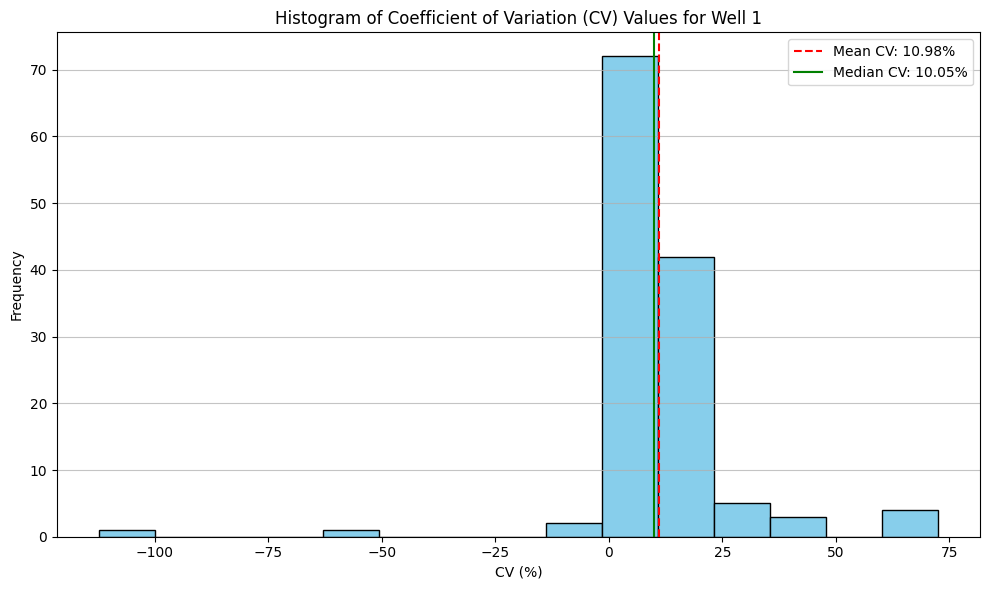

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.058271,0.058703,0.004390,7.534517,0.051608,0.063482,0.011874
X2,0.047774,0.047473,0.005546,11.609049,0.039319,0.054567,0.015248
X3,349.815349,339.405263,43.795480,12.519599,296.564961,408.267470,111.702509
X4,2.942719,2.814302,0.235051,7.987538,2.634854,3.249970,0.615116
X5,5.352429,5.359986,0.193699,3.618898,5.065489,5.604749,0.539261
...,...,...,...,...,...,...,...
X126,0.052700,0.051998,0.004681,8.882010,0.046833,0.059716,0.012883
X127,9.201940,9.958309,3.318782,36.066119,5.227531,12.766425,7.538893
X128,33.610881,34.215859,1.759066,5.233622,30.347390,35.177296,4.829906
X129,0.001286,0.001218,0.000133,10.336089,0.001169,0.001484,0.000314


In [6]:
import matplotlib.pyplot as plt
import numpy as np


def analyze_feature_variability(df: pd.DataFrame, df_name: str, show_plots=False):
    """
    Analyze measurements for a specific well by plotting the data points and calculating statistics.

    Args:
        df: DataFrame containing the measurements
        well: Well number to analyze
        title: Optional title for the plot
    """

    # Compute statistics for all columns but only display plots for the first 20
    stats_cols = FEATURE_COLS  # Use all columns for statistics
    display_cols = FEATURE_COLS[:20]  # Only display first 20 in plots

    # Calculate summary statistics for all measurement columns
    stats_data = {
        "Mean": df[stats_cols].mean(),
        "Median": df[stats_cols].median(),
        "StdDev": df[stats_cols].std(),
        "CV(%)": (df[stats_cols].std() / df[stats_cols].mean()) * 100,
        "Min": df[stats_cols].min(),
        "Max": df[stats_cols].max(),
        "Range": df[stats_cols].max() - df[stats_cols].min(),
    }
    stats_summary = pd.DataFrame(stats_data)

    if show_plots:
        display(stats_summary)

        # Create figure with subplots
        fig, axes = plt.subplots(5, 4, figsize=(16, 15))
        axes = axes.flatten()

        # For each measurement column, plot the data points and calculate statistics
        for i, col in enumerate(display_cols):
            if i >= len(axes):
                break

            values = df[col].values

            # Calculate statistics
            mean_val = np.mean(values)
            median_val = np.median(values)
            std_val = np.std(values)
            cv = (
                (std_val / mean_val) * 100 if mean_val != 0 else float("nan")
            )  # Coefficient of variation

            # Plot individual data points
            axes[i].scatter(range(len(values)), values, color="blue")
            axes[i].axhline(
                y=mean_val, color="r", linestyle="-", label=f"Mean: {mean_val:.2f}"
            )
            axes[i].axhline(
                y=median_val,
                color="g",
                linestyle="--",
                label=f"Median: {median_val:.2f}",
            )

            # Add standard deviation band
            axes[i].axhspan(
                mean_val - std_val, mean_val + std_val, alpha=0.2, color="red"
            )

            axes[i].set_title(f"{col}\nCV: {cv:.2f}%, StdDev: {std_val:.4f}")
            axes[i].set_xticks(range(len(values)))
            axes[i].set_xticklabels([f"M{j + 1}" for j in range(len(values))])
            axes[i].legend(fontsize="small")

        # Hide any unused subplots
        for i in range(len(display_cols), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        fig.suptitle(f"{df_name}", fontsize=16, y=1.02)

        # Print summary statistics for all measurements
        # Create a histogram of coefficient of variation (CV) values
        plt.figure(figsize=(10, 6))

        # Extract CV values directly from stats_data
        cv_values = stats_data["CV(%)"].values

        plt.hist(cv_values, bins=15, color="skyblue", edgecolor="black")
        plt.title(f"Histogram of Coefficient of Variation (CV) Values for {df_name}")
        plt.xlabel("CV (%)")
        plt.ylabel("Frequency")
        plt.grid(axis="y", alpha=0.75)

        # Add vertical line for mean CV
        mean_cv = np.mean(cv_values)
        plt.axvline(
            mean_cv, color="red", linestyle="--", label=f"Mean CV: {mean_cv:.2f}%"
        )

        # Add vertical line for median CV
        median_cv = np.median(cv_values)
        plt.axvline(
            median_cv,
            color="green",
            linestyle="-",
            label=f"Median CV: {median_cv:.2f}%",
        )

        plt.legend()
        plt.tight_layout()
        plt.show()
    return stats_summary


analyze_feature_variability(df[df["well"] == 1], "Well 1", show_plots=True)

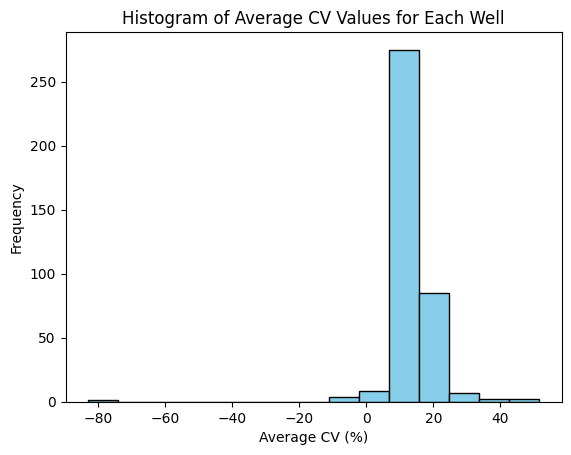

In [7]:
avg_well_CVs = []

high_cv_threshold = 25.0  # 25% is often considered high variability
for well in set(df["well"]):
    well_stats = analyze_feature_variability(
        df[df["well"] == well], f"Well {well}", show_plots=False
    )
    well_CV_values = well_stats["CV(%)"].values
    avg_well_CV = np.mean(well_CV_values)
    avg_well_CVs.append(avg_well_CV)

    # Create sorted_features list from well_stats
    sorted_features = [
        (feature, cv) for feature, cv in zip(well_stats.index, well_stats["CV(%)"])
    ]
    high_cv_features = [
        (feature, cv) for feature, cv in sorted_features if cv > high_cv_threshold
    ]

    # # Check if there are any high CV features for this well
    # if high_cv_features:
    #     print(
    #         f"Well {well} has {len(high_cv_features)} features with CV > {high_cv_threshold}%"
    #     )
    #     # Get the feature name with high CV
    #     high_cv_feature = high_cv_features[0][0]
    #     high_cv_value = high_cv_features[0][1]
    #     print(f"Example high CV feature: {high_cv_feature} (CV: {high_cv_value:.2f}%)")
    #     # Display the values of this feature for the current well
    #     well_data = df[df["well"] == well]
    #     print(f"Values for {high_cv_feature} in well {well}:")
    #     display(well_data[high_cv_feature])
    # else:
    #     print(f"No features with CV > {high_cv_threshold}% for well {well}")

avg_well_CVs = np.array(avg_well_CVs)

plt.hist(avg_well_CVs, bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram of Average CV Values for Each Well")
plt.xlabel("Average CV (%)")
plt.ylabel("Frequency")
plt.show()

Based on this analysis, it seems reasonable to take a median of the feature measurements for each well. This will produce a single set of feature measurements for each well.


In [8]:
processed_dfs = {}
for set_number, slides in dfs.items():
    processed_dfs[set_number] = {}
    for slide_number, df in slides.items():
        # Group by well: get median for features and first occurrence for metadata
        new_df = df.groupby("well").agg(
            {
                **{col: "median" for col in FEATURE_COLS},
                **{col: "first" for col in METADATA_COLS if col != "well"},
            }
        )

        # Reset index to make well a regular column again
        new_df = new_df.reset_index()

        # Ensure the order of columns matches the original DataFrame
        new_df = new_df[df.columns.tolist()]
        processed_dfs[set_number][slide_number] = new_df


processed_dfs[1][1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X128,X129,X130,type,row,col,well,set,type.f,slide
0,0.058703,0.047473,339.405263,2.814302,5.359986,7.471565,0.197044,68.755236,259.954936,11.704548,...,34.215859,0.001218,0.726783,fit1,1,1,1,1,2,1
1,0.052917,0.043114,330.014976,3.580488,6.538862,8.280798,0.163056,54.636078,266.998584,13.234305,...,48.240113,0.001116,0.742736,bscl2,1,2,2,1,1,1
2,0.058053,0.050606,327.795411,3.164617,5.555491,7.671293,0.205977,57.654587,263.994158,11.169138,...,35.385199,0.000733,0.746037,gene,1,3,3,1,3,1
3,0.064786,0.055854,334.971096,2.807814,5.079066,7.056355,0.158037,58.586686,259.338159,10.965109,...,31.543950,0.000881,0.739885,gene,1,4,4,1,3,1
4,0.060893,0.051779,339.042043,3.081632,5.195757,7.603377,0.220992,61.439967,248.020107,12.536984,...,31.701031,0.000901,0.735739,gene,1,5,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.062962,0.053651,354.089936,2.879829,5.315987,7.409645,0.169111,66.193782,247.600559,12.816720,...,33.819367,0.001201,0.733497,gene,16,20,380,1,3,1
380,0.051433,0.042980,351.141079,3.130082,5.738459,8.298166,0.187221,67.474338,282.651357,11.029318,...,35.423029,0.001275,0.731775,gene,16,21,381,1,3,1
381,0.054519,0.044388,314.447071,3.303254,5.689866,8.060372,0.160341,61.604508,284.013752,11.350219,...,36.110020,0.001206,0.737233,gene,16,22,382,1,3,1
382,0.055714,0.043664,337.492148,3.034476,5.640026,7.884854,0.170099,67.365110,278.328160,10.462254,...,37.169131,0.001228,0.726960,rf,16,23,383,1,4,1


# Analyze the variability of the controls for a given set and slide


,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.067981,0.067698,0.004823,7.094964,0.060260,0.077118,0.016858
X2,0.062750,0.062456,0.004805,7.656588,0.054932,0.073080,0.018148
X3,340.328025,342.386955,20.362108,5.983083,304.912473,372.785385,67.872911
X4,2.558244,2.546627,0.135117,5.281618,2.372624,2.805704,0.433080
X5,4.926581,4.929239,0.173811,3.528022,4.588673,5.247103,0.658430
...,...,...,...,...,...,...,...
X126,0.066477,0.066021,0.004172,6.275487,0.059898,0.075060,0.015162
X127,5.419717,5.313175,0.643263,11.868945,4.373678,6.982894,2.609216
X128,31.393784,31.744199,1.462574,4.658800,28.697987,33.982877,5.284890
X129,0.000648,0.000694,0.000127,19.614284,0.000418,0.000836,0.000418


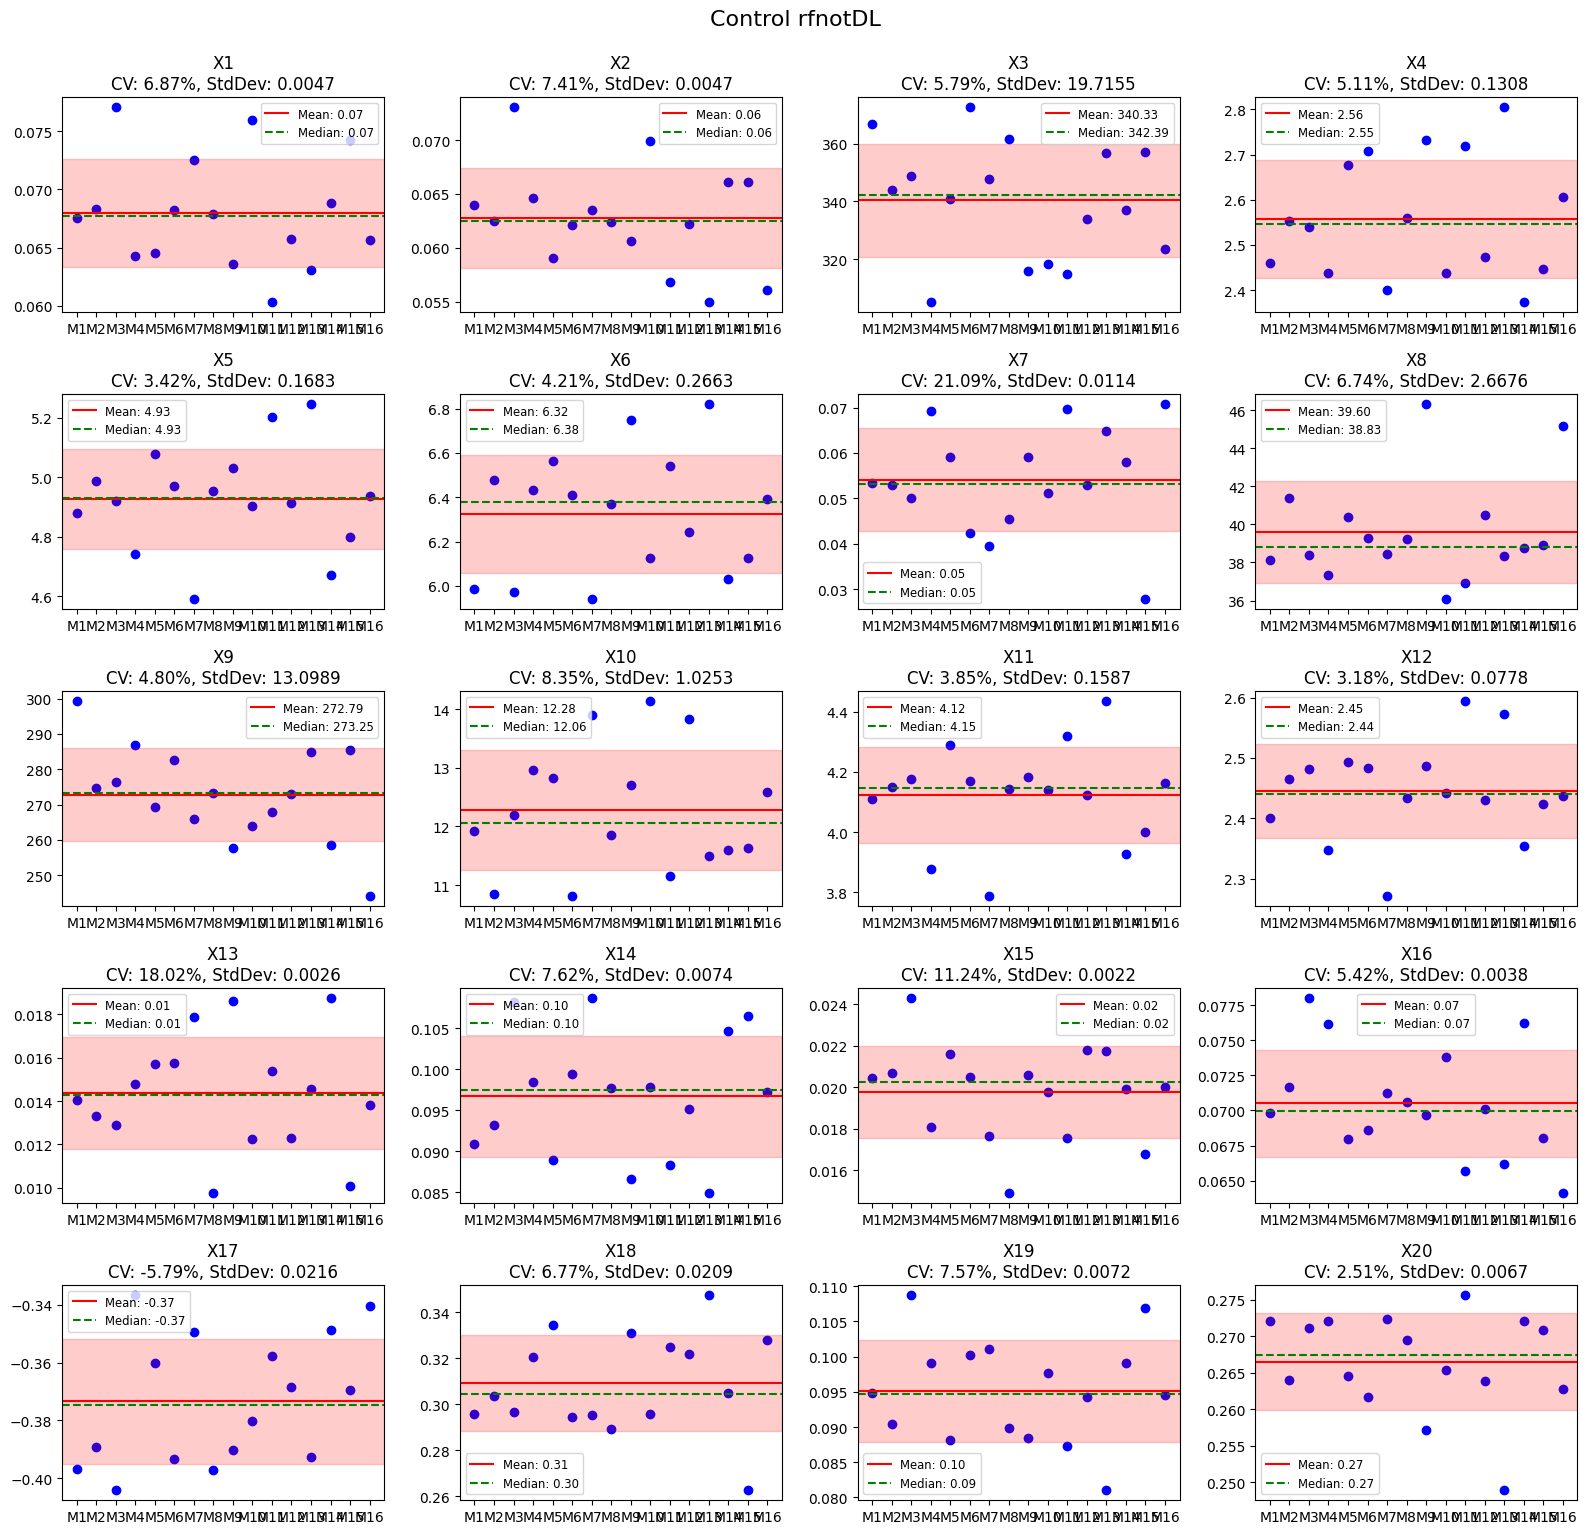

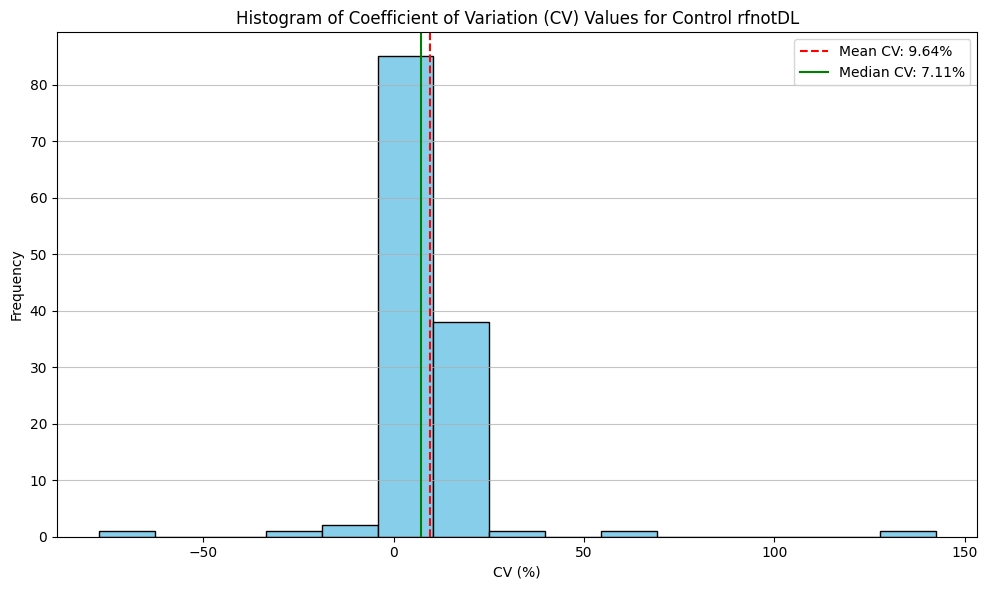

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.059106,0.058526,0.002394,4.049634,0.056232,0.062069,0.005837
X2,0.049109,0.047653,0.003590,7.310446,0.044931,0.054709,0.009778
X3,328.473974,336.863413,18.058387,5.497662,297.058860,345.099036,48.040176
X4,2.881840,2.906680,0.126152,4.377481,2.648051,3.042462,0.394411
X5,5.357861,5.361878,0.168642,3.147556,5.038179,5.582975,0.544796
...,...,...,...,...,...,...,...
X126,0.054344,0.053405,0.002804,5.159405,0.051001,0.058967,0.007966
X127,8.964610,9.139890,0.790241,8.815120,7.524714,9.958309,2.433594
X128,33.512291,33.849100,1.573503,4.695300,30.131270,35.275559,5.144289
X129,0.001027,0.001076,0.000152,14.835480,0.000789,0.001218,0.000429


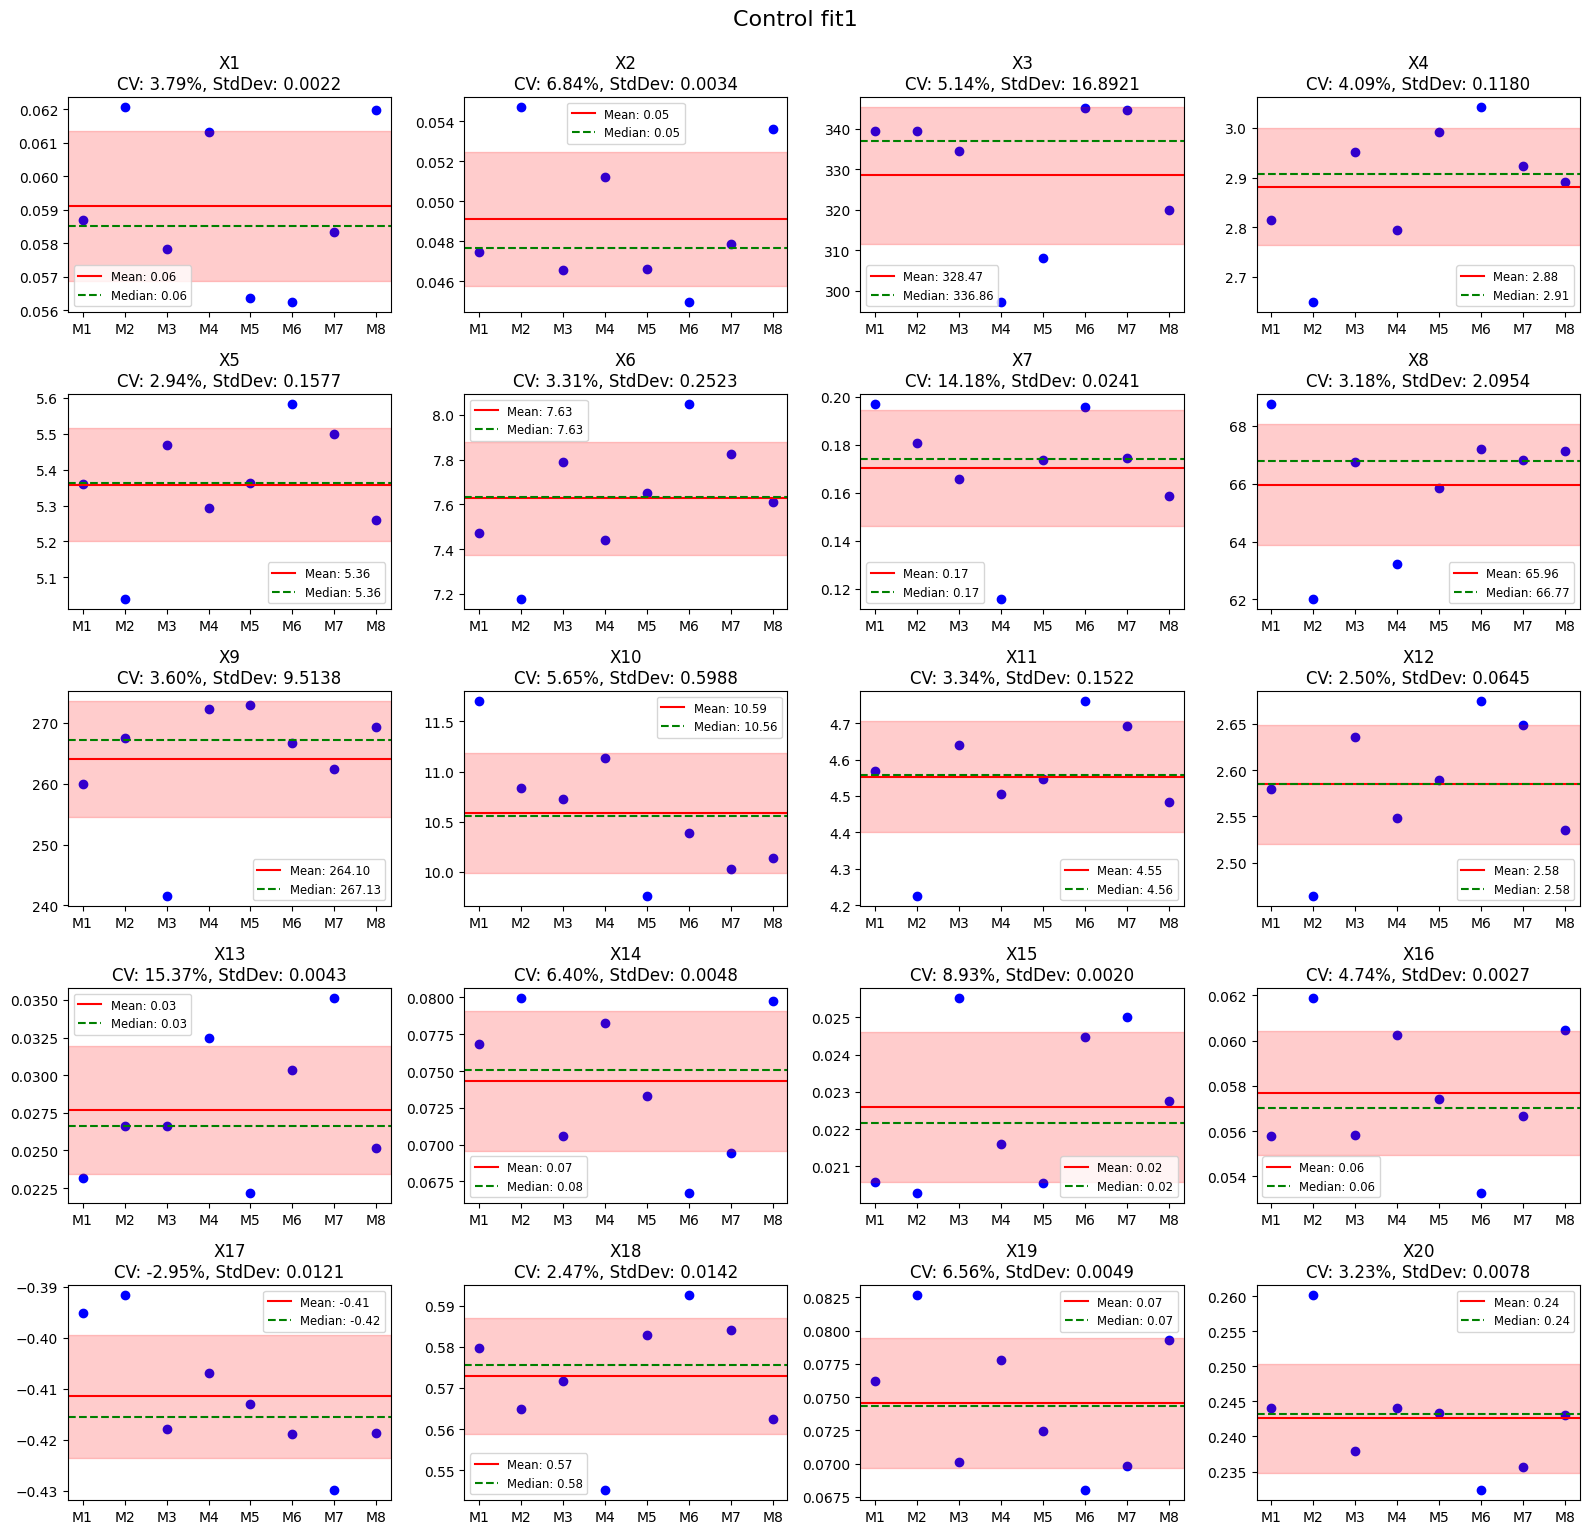

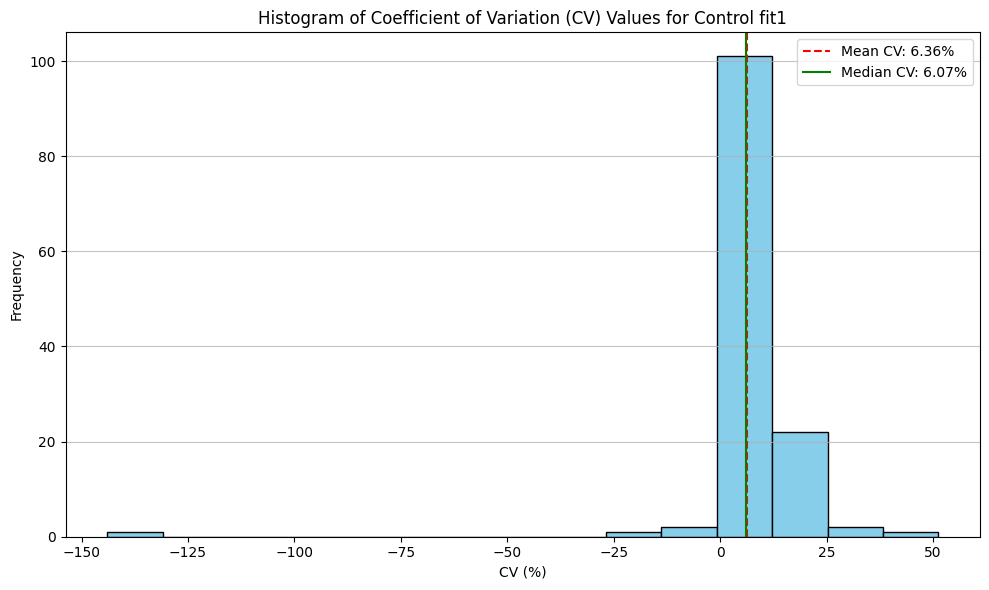

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.057967,0.057783,0.004097,7.067503,0.050352,0.064840,0.014488
X2,0.048267,0.048299,0.005071,10.505743,0.038534,0.056930,0.018396
X3,334.245887,336.789416,19.943962,5.966854,288.856487,376.939324,88.082837
X4,2.997973,2.964215,0.184650,6.159169,2.731039,3.437388,0.706349
X5,5.488054,5.439309,0.229682,4.185119,5.142545,5.999412,0.856868
...,...,...,...,...,...,...,...
X126,0.054196,0.053964,0.004457,8.223573,0.045394,0.062410,0.017016
X127,8.139882,7.806958,1.089293,13.382177,6.493467,10.445201,3.951734
X128,35.505241,35.227440,2.464658,6.941673,31.412117,43.270872,11.858755
X129,0.001130,0.001078,0.000233,20.577147,0.000816,0.001799,0.000983


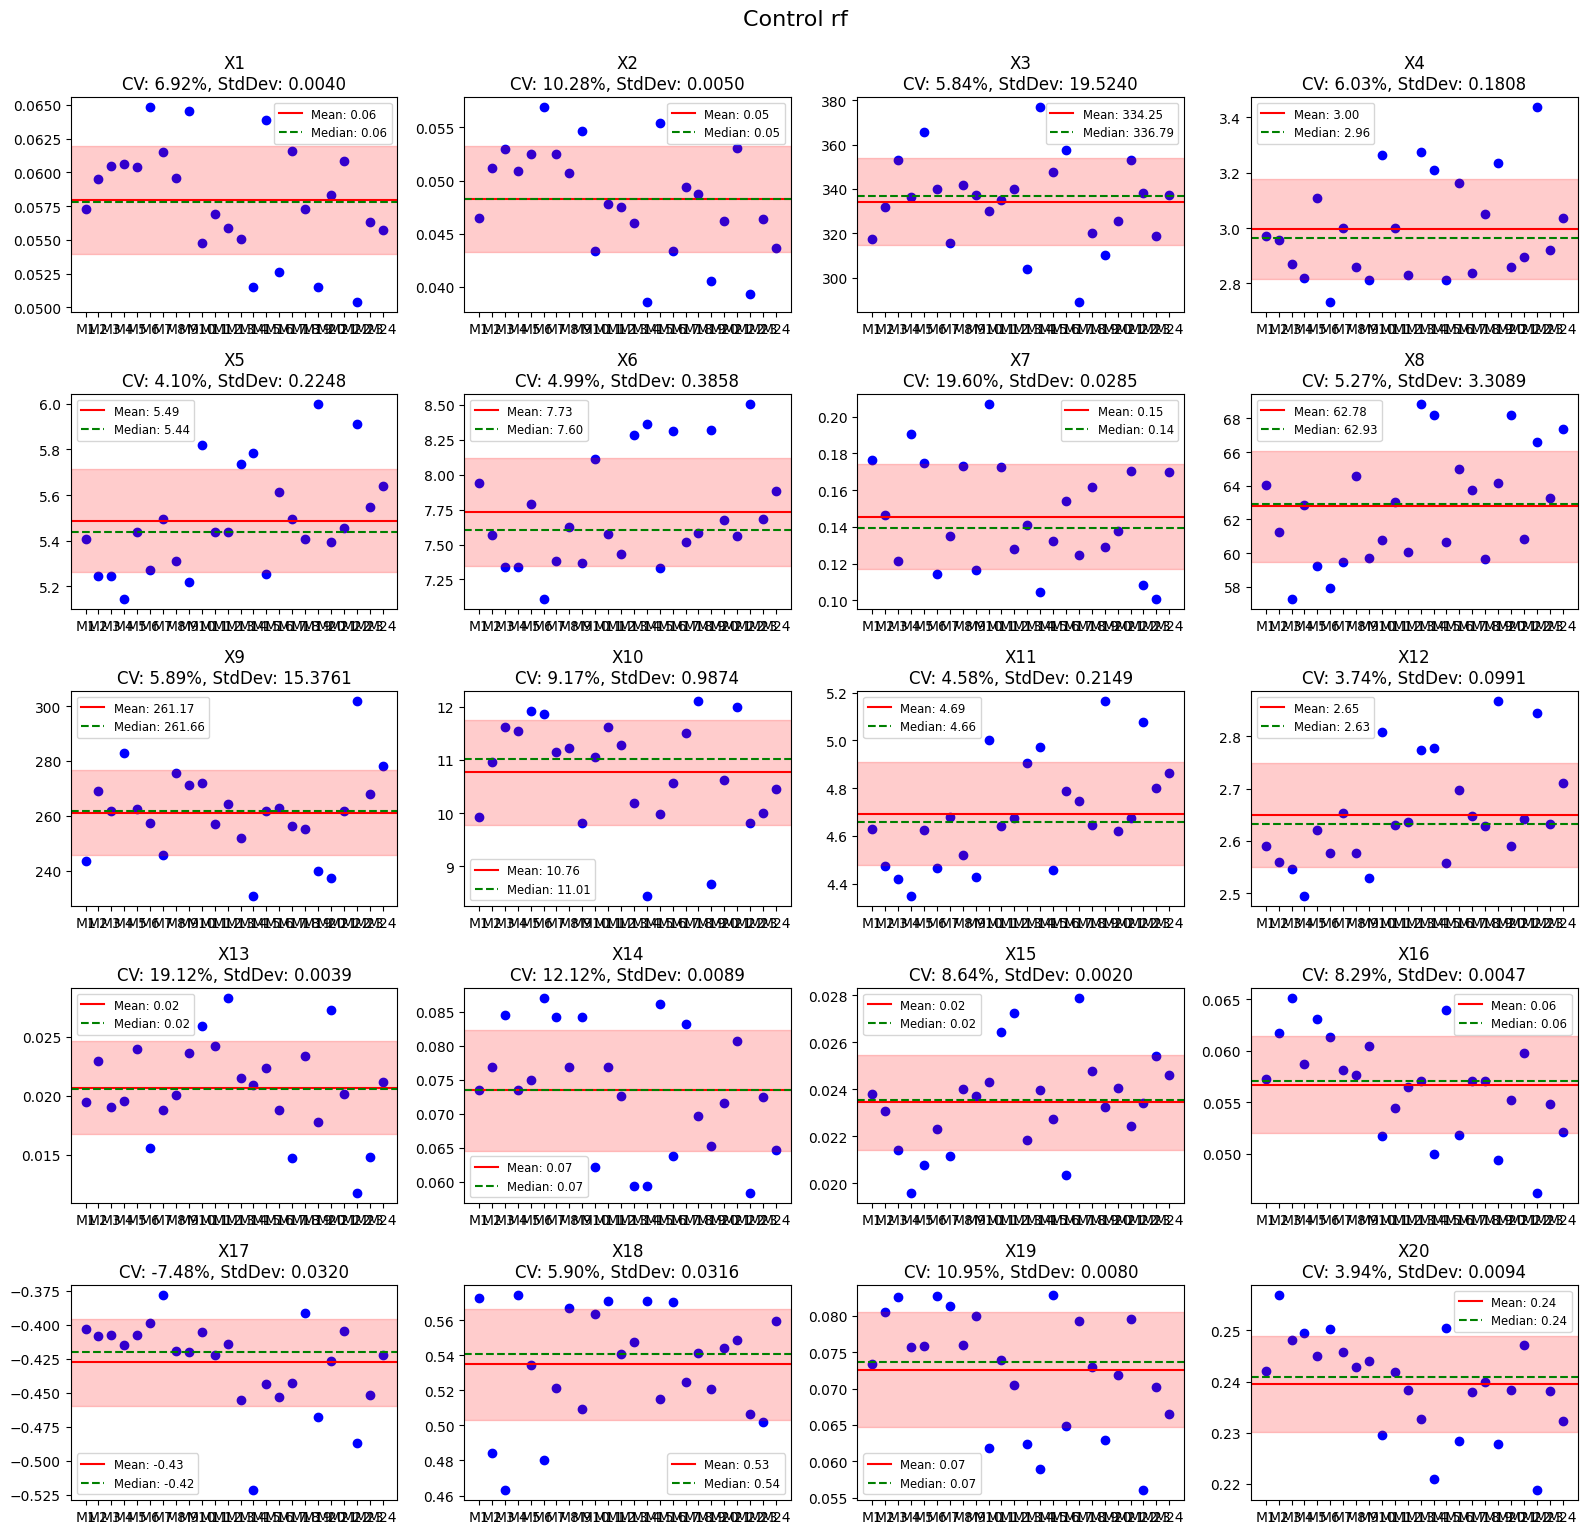

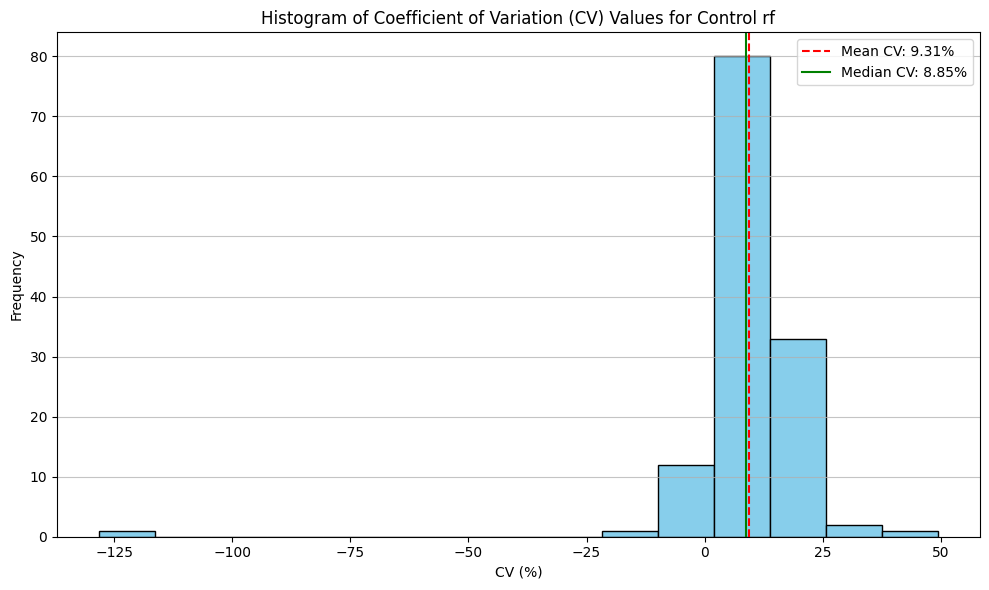

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.050465,0.050359,0.003598,7.129916,0.043587,0.058073,0.014486
X2,0.040712,0.040390,0.004001,9.827294,0.034814,0.048939,0.014124
X3,321.186663,322.575366,16.914573,5.266275,298.595176,359.753744,61.158568
X4,3.541373,3.547729,0.148969,4.206524,3.264421,3.823994,0.559573
X5,6.552791,6.562948,0.254025,3.876597,6.165268,7.047205,0.881937
...,...,...,...,...,...,...,...
X126,0.047687,0.046661,0.002905,6.092856,0.043883,0.053659,0.009776
X127,6.452370,6.385674,1.072246,16.617868,4.389284,8.553525,4.164241
X128,47.428258,48.299940,3.289164,6.935030,42.569322,53.233645,10.664323
X129,0.000991,0.000995,0.000173,17.428679,0.000497,0.001267,0.000770


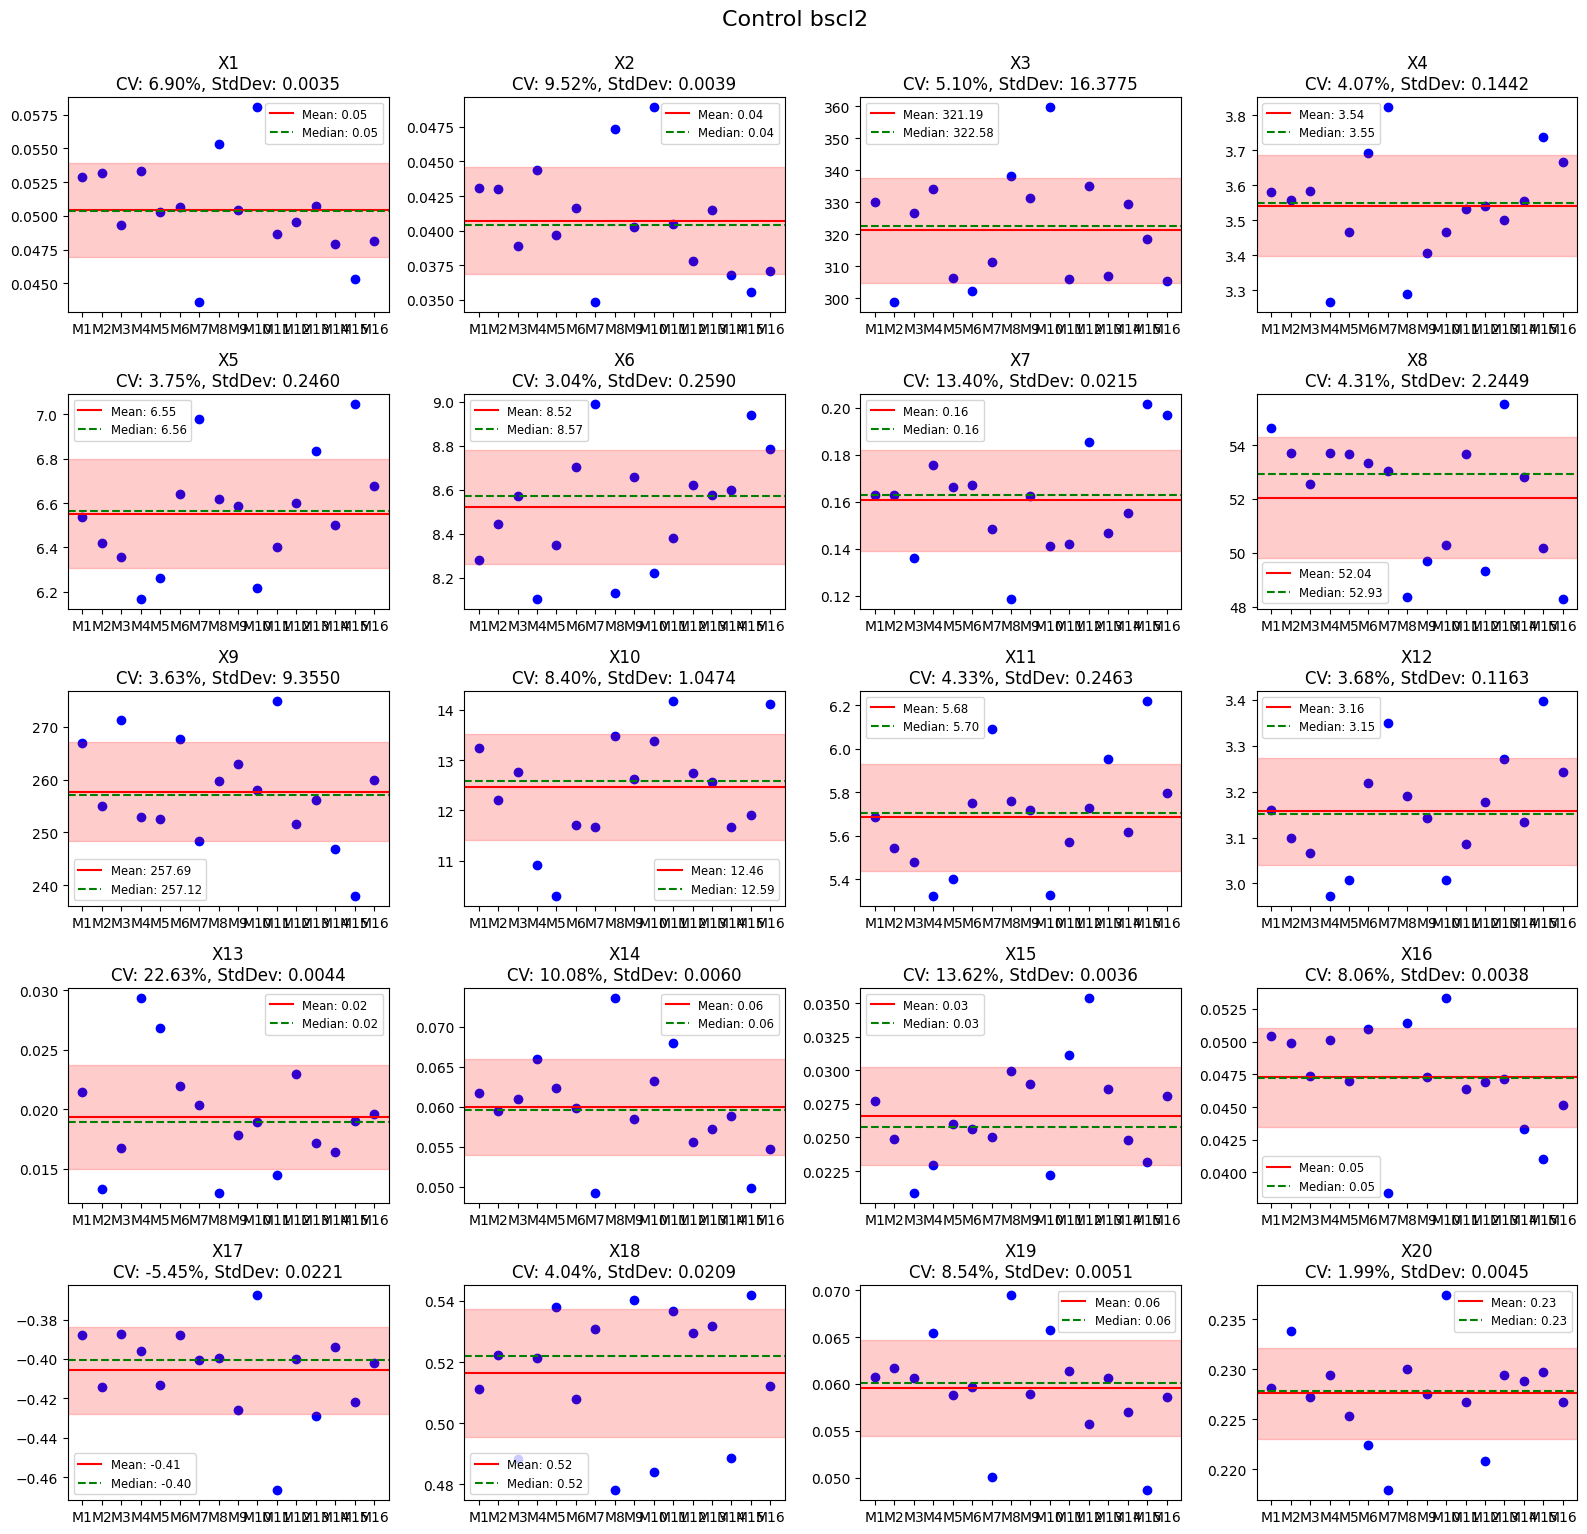

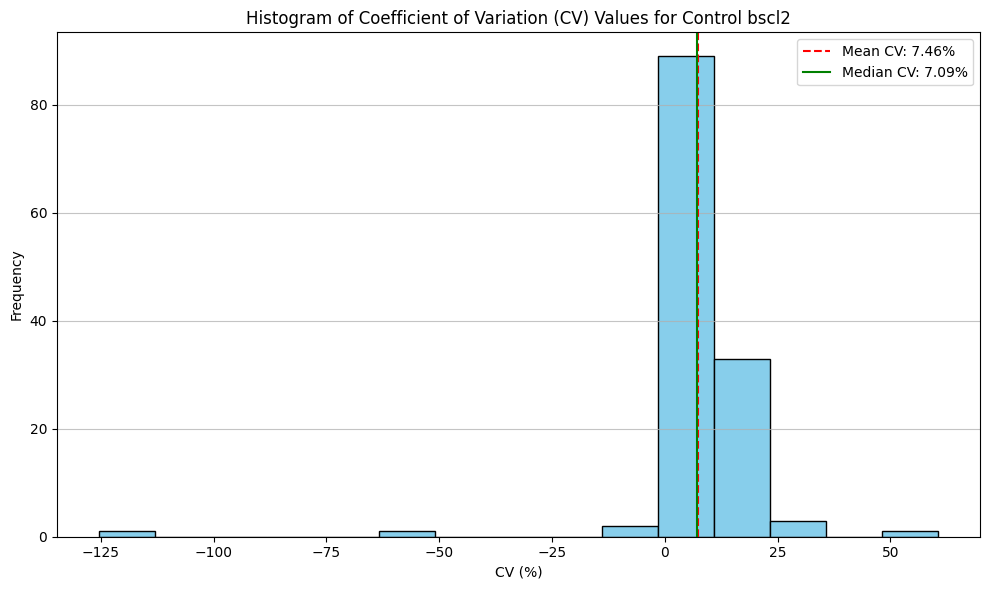

In [9]:
import matplotlib.pyplot as plt

df = processed_dfs[1][1]

for control in CONTROLS:
    analyze_feature_variability(
        df[df["type"] == control], f"Control {control}", show_plots=True
    )


The replicates are relatively consistent. As such, we can take the median of the feature measurements for each replicate to establish a baseline for the slide.


In [10]:
# Compute median of features for each control type across all sets and slides
control_medians_list = []

for set_number, slides in processed_dfs.items():
    for slide_number, df in slides.items():
        for control in CONTROLS:
            control_df = df[df["type"] == control]

            if not control_df.empty:
                # Get feature medians and add metadata
                median_data = control_df[FEATURE_COLS].median().to_dict()
                median_data.update(
                    {"set": set_number, "slide": slide_number, "type": control}
                )
                control_medians_list.append(median_data)

# Create DataFrame with all control medians
control_medians_df = pd.DataFrame(control_medians_list)
control_medians_df = control_medians_df.sort_values(by=["slide", "type"])
control_medians_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X124,X125,X126,X127,X128,X129,X130,set,slide,type
35,0.050359,0.040390,322.575366,3.547729,6.562948,8.572574,0.162851,52.928857,257.119819,12.587959,...,0.038497,10.764842,0.046661,6.385674,48.299940,0.000995,0.743943,1,1,bscl2
33,0.058526,0.047653,336.863413,2.906680,5.361878,7.630877,0.174004,66.774085,267.125162,10.557959,...,0.047442,10.595619,0.053405,9.139890,33.849100,0.001076,0.726997,1,1,fit1
34,0.057783,0.048299,336.789416,2.964215,5.439309,7.604559,0.139322,62.930393,261.655094,11.014790,...,0.046688,11.028036,0.053964,7.806958,35.227440,0.001078,0.730647,1,1,rf
32,0.067698,0.062456,342.386955,2.546627,4.929239,6.379971,0.053151,38.827879,273.247107,12.062210,...,0.061189,9.784846,0.066021,5.313175,31.744199,0.000694,0.751022,1,1,rfnotDL
27,0.046592,0.037310,328.654351,3.644190,6.804306,8.704798,0.148726,52.051764,260.903973,12.501957,...,0.037055,10.776114,0.044999,5.714991,51.028759,0.001129,0.742637,1,2,bscl2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.061225,0.056176,327.152592,2.787135,5.101802,6.627749,0.073371,42.005508,279.704063,11.672962,...,0.054135,9.392457,0.061985,5.149511,32.261456,0.000960,0.744707,11,32,rfnotDL
55,0.050911,0.039748,329.526285,3.469590,6.175160,8.414709,0.186204,58.073571,257.003143,12.305898,...,0.039842,10.777393,0.048343,6.857863,42.417000,0.001419,0.739066,11,33,bscl2
53,0.055106,0.043720,329.364750,2.918382,5.599052,8.125398,0.171413,69.566781,258.781963,10.757416,...,0.042153,10.709715,0.050727,8.994954,36.871191,0.001212,0.715211,11,33,fit1
54,0.056284,0.045533,328.417687,2.988688,5.525152,7.923710,0.188016,64.231247,260.273347,11.238252,...,0.044753,11.370899,0.052534,7.996932,35.964418,0.001398,0.719437,11,33,rf


,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.058430,0.057973,0.004778,8.176585,0.049448,0.067698,0.018250
X2,0.050109,0.048899,0.006084,12.141996,0.039770,0.062456,0.022686
X3,327.091095,326.857784,6.881326,2.103795,312.767329,342.386955,29.619626
X4,2.939477,2.896218,0.237996,8.096547,2.484205,3.509961,1.025756
X5,5.444429,5.462965,0.327268,6.011065,4.905119,6.184891,1.279772
...,...,...,...,...,...,...,...
X126,0.056823,0.056768,0.005330,9.380480,0.047029,0.066021,0.018992
X127,4.693617,4.744659,0.341849,7.283279,4.043363,5.496290,1.452927
X128,37.407309,38.364064,3.871556,10.349732,31.196960,44.919866,13.722906
X129,0.000691,0.000626,0.000205,29.686866,0.000393,0.001276,0.000883


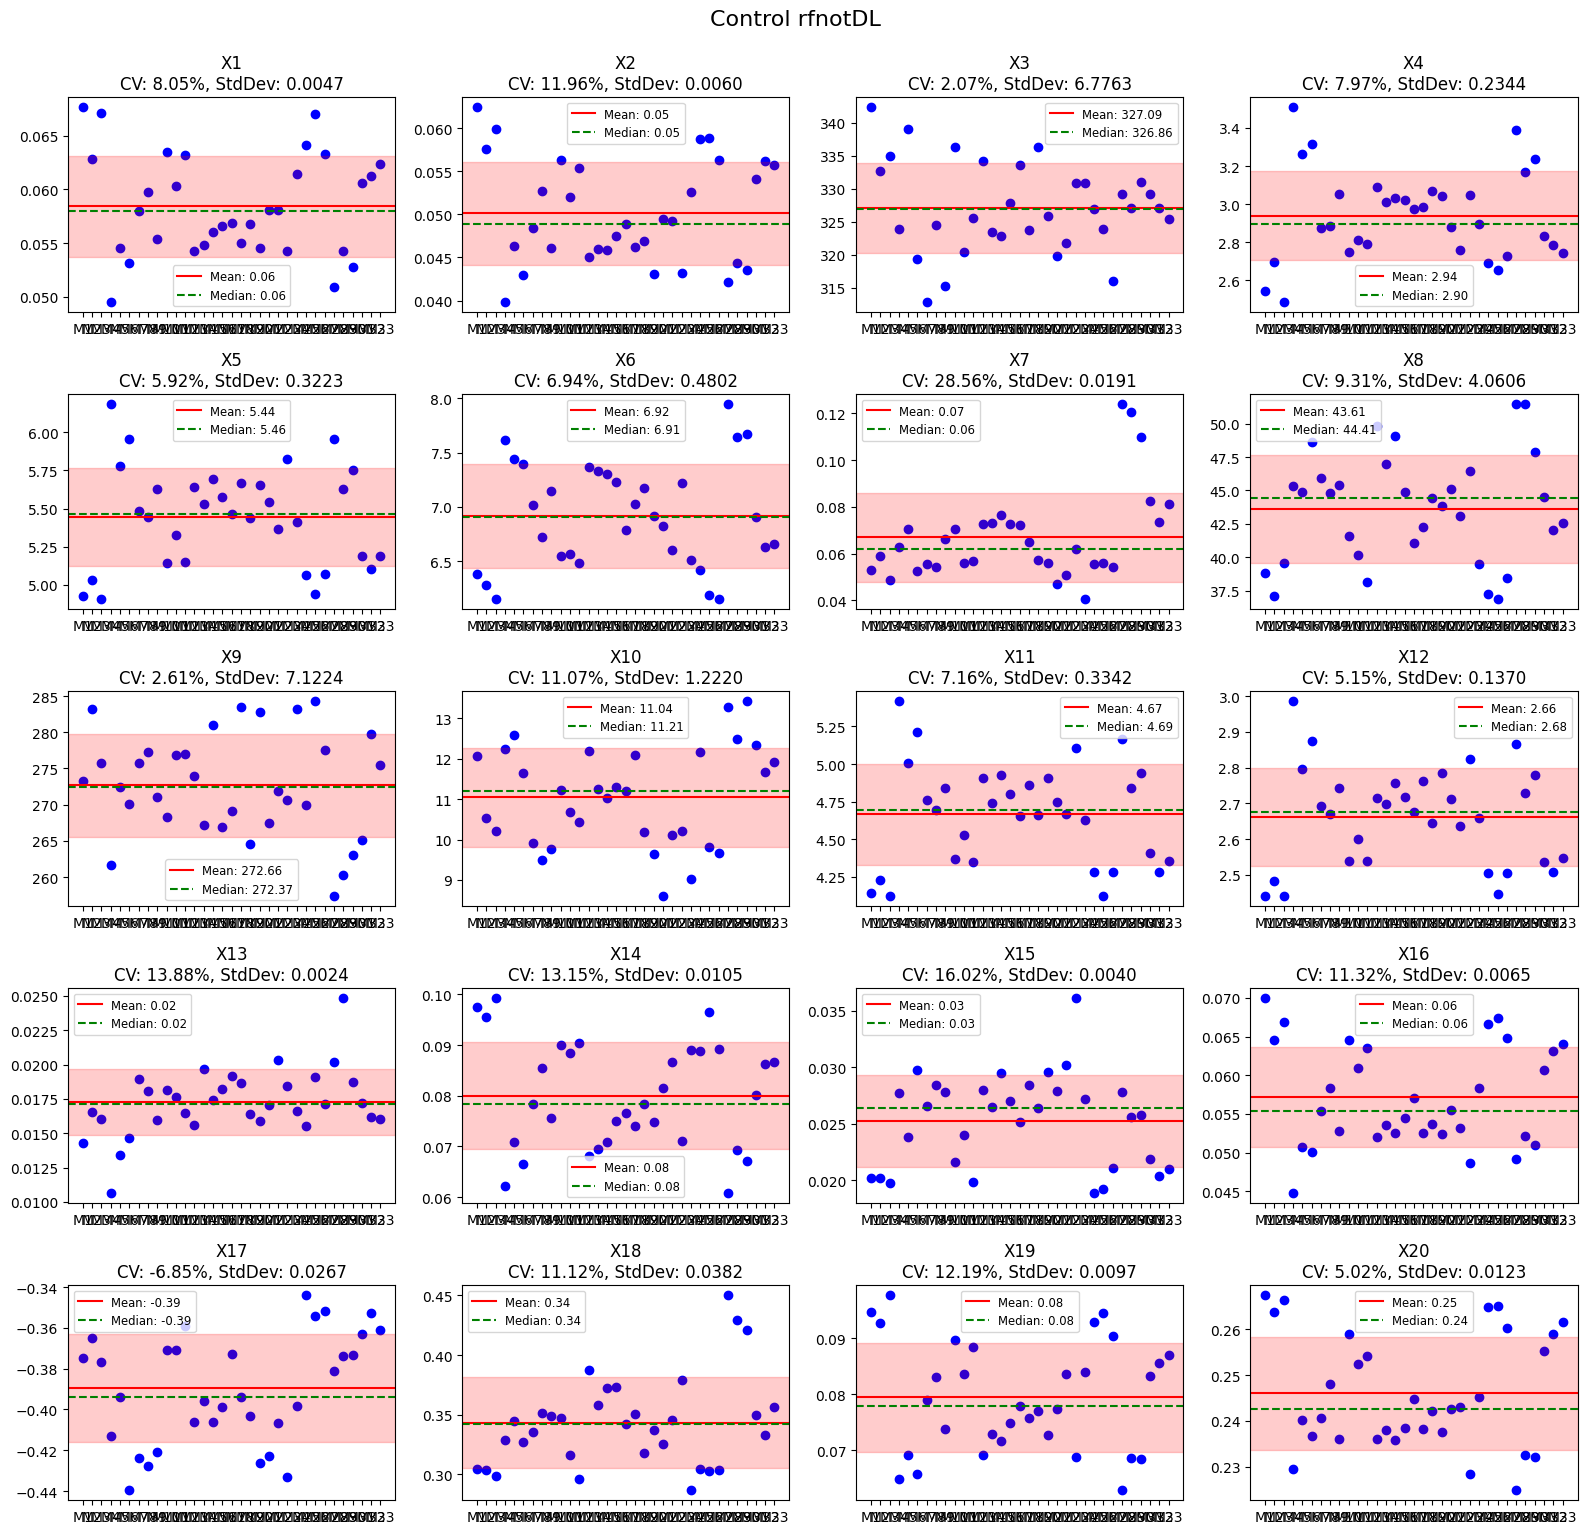

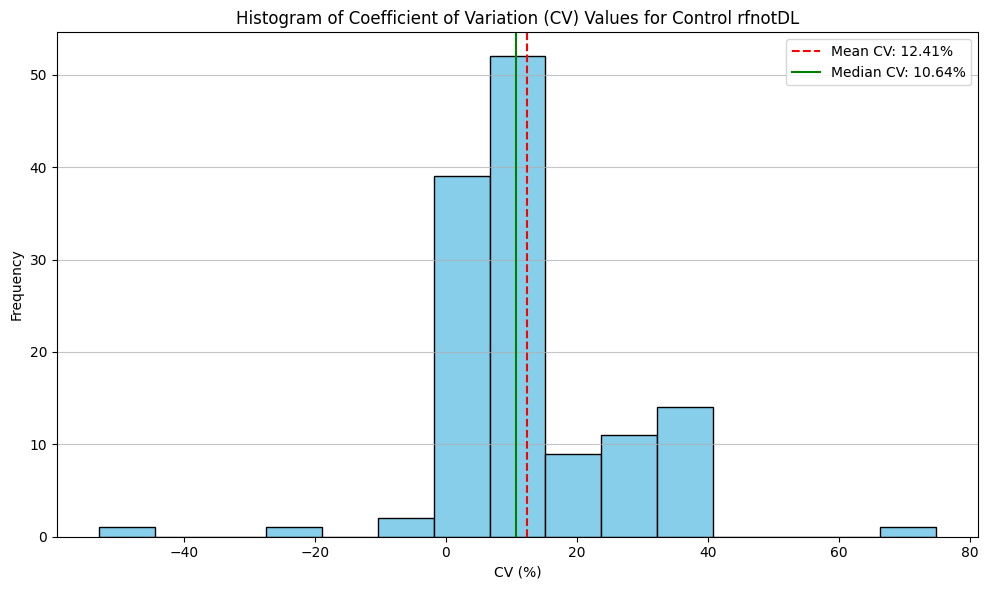

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.054180,0.054962,0.003067,5.660314,0.048184,0.059295,0.011111
X2,0.043184,0.043720,0.003633,8.413884,0.035471,0.048690,0.013219
X3,328.227608,328.204773,6.627177,2.019080,312.214146,346.528024,34.313878
X4,3.080404,3.096278,0.211844,6.877162,2.669794,3.418071,0.748277
X5,5.638998,5.633989,0.206085,3.654646,5.211544,6.096650,0.885106
...,...,...,...,...,...,...,...
X126,0.050679,0.051076,0.002832,5.589008,0.044286,0.055880,0.011594
X127,7.709991,7.883374,1.165204,15.112903,4.956636,10.516989,5.560353
X128,37.576514,36.871191,2.521226,6.709580,33.500144,43.416562,9.916418
X129,0.001016,0.000967,0.000300,29.518744,0.000426,0.001842,0.001417


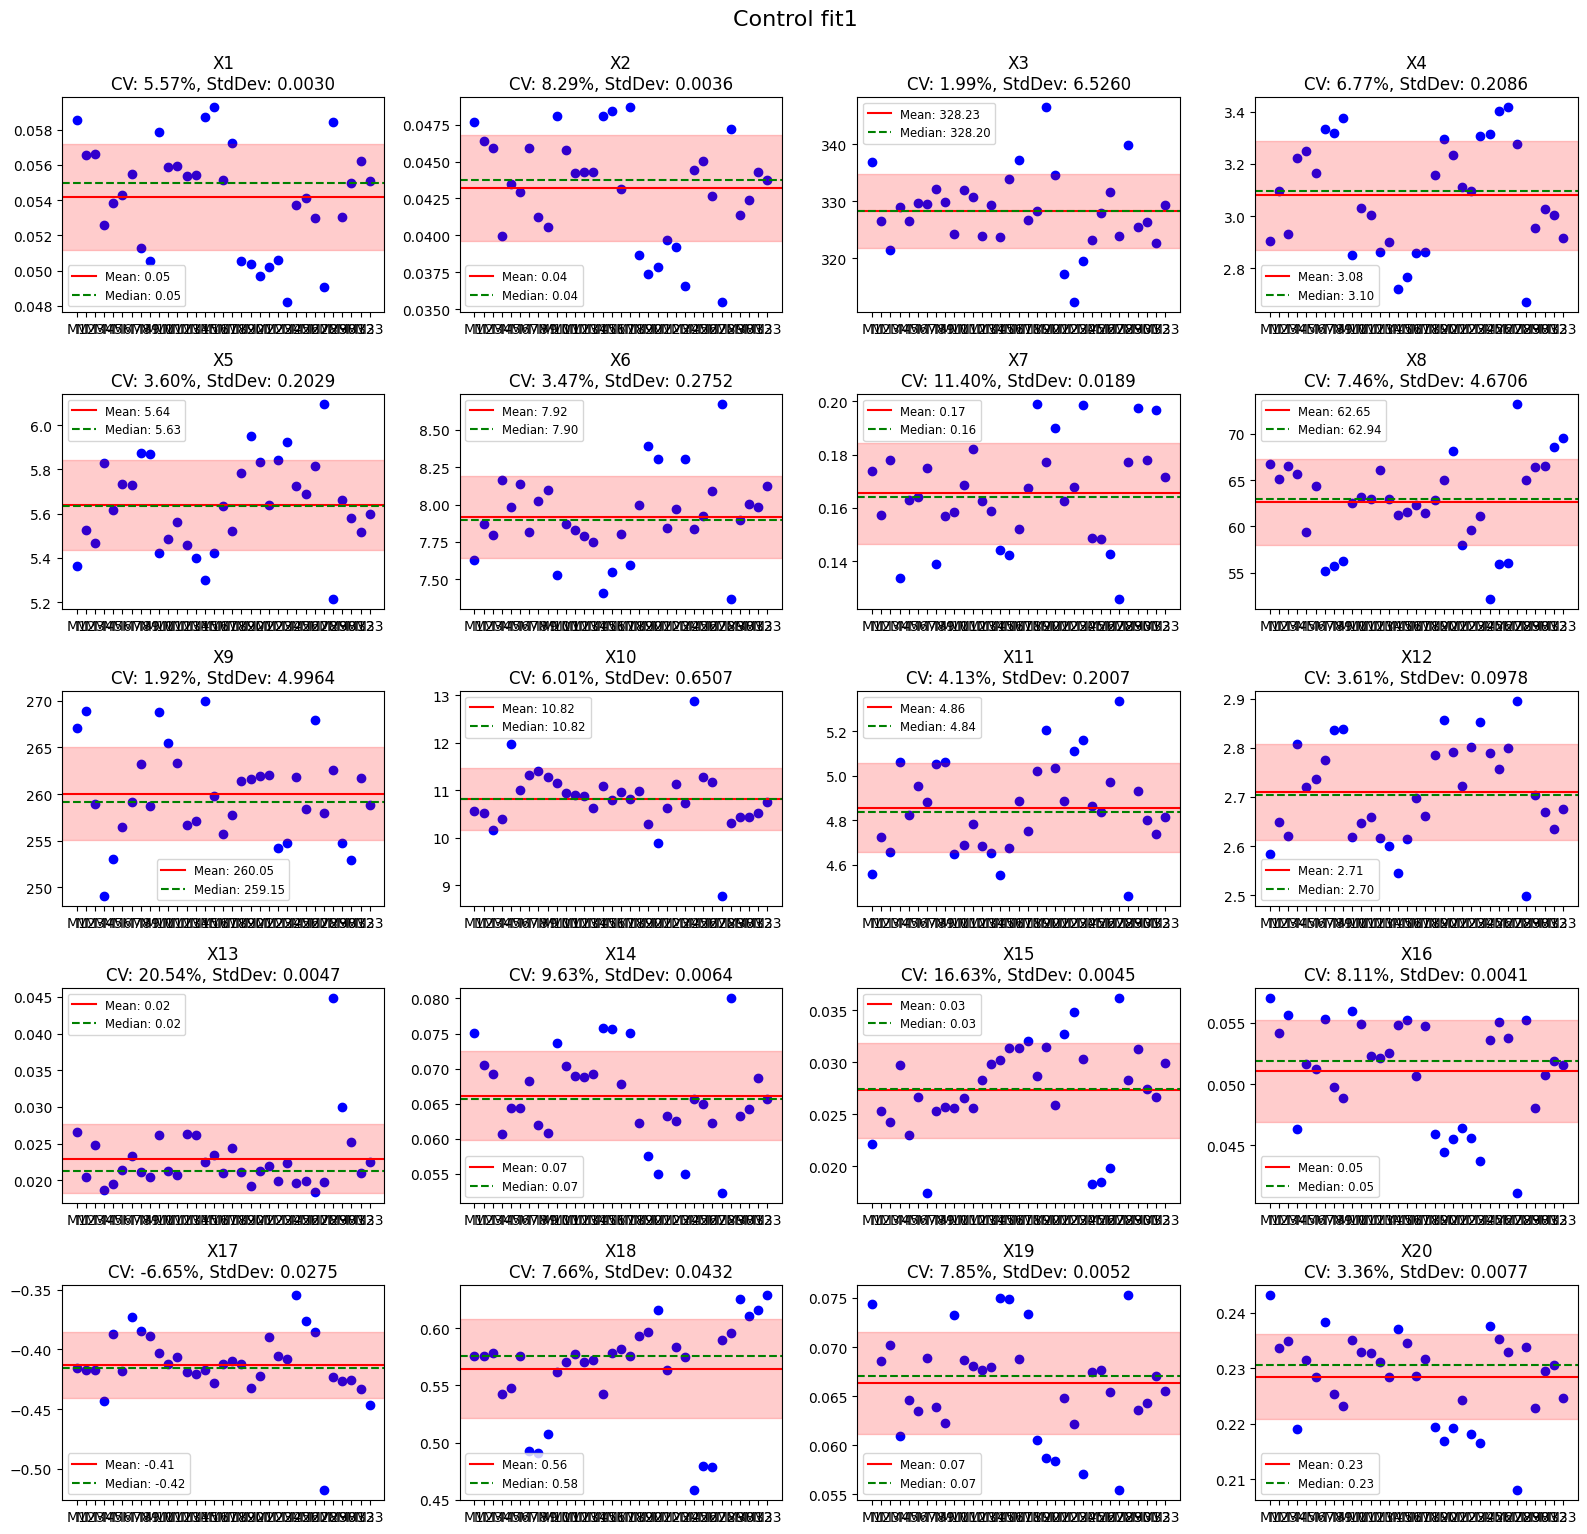

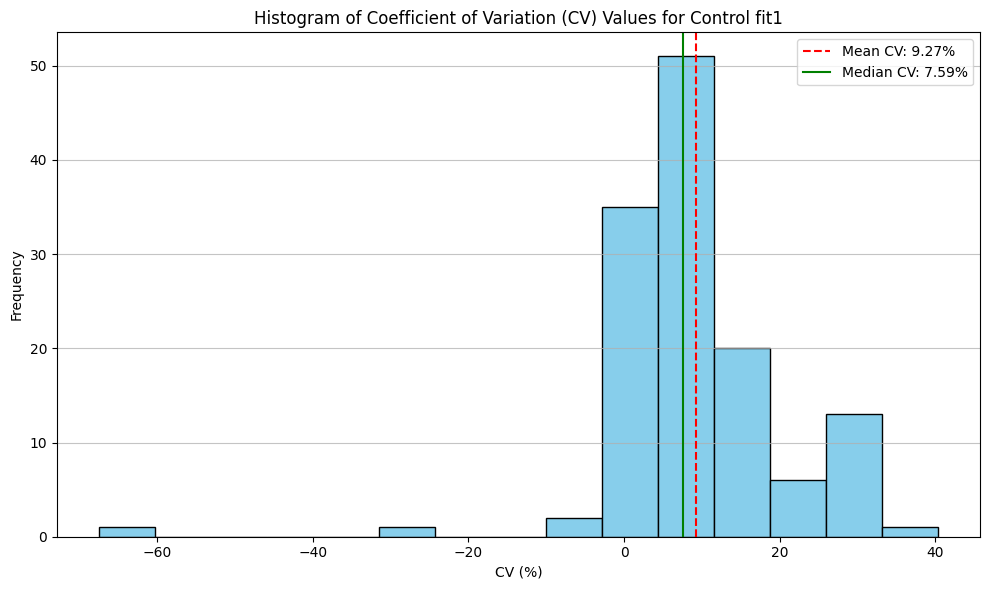

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.053294,0.054131,0.003200,6.005311,0.047697,0.059667,0.011970
X2,0.042380,0.043365,0.003867,9.123907,0.035833,0.050228,0.014395
X3,330.282122,329.563203,4.367358,1.322311,321.413927,339.388832,17.974904
X4,3.101316,3.061063,0.148059,4.774072,2.832001,3.350652,0.518651
X5,5.691207,5.653364,0.217719,3.825537,5.334606,6.138742,0.804136
...,...,...,...,...,...,...,...
X126,0.049848,0.050239,0.003139,6.297407,0.044370,0.056733,0.012363
X127,7.608014,7.723917,0.727509,9.562406,6.319154,8.893262,2.574107
X128,38.102749,37.742167,2.649496,6.953557,34.140710,43.752575,9.611865
X129,0.001043,0.001011,0.000258,24.678573,0.000578,0.001634,0.001056


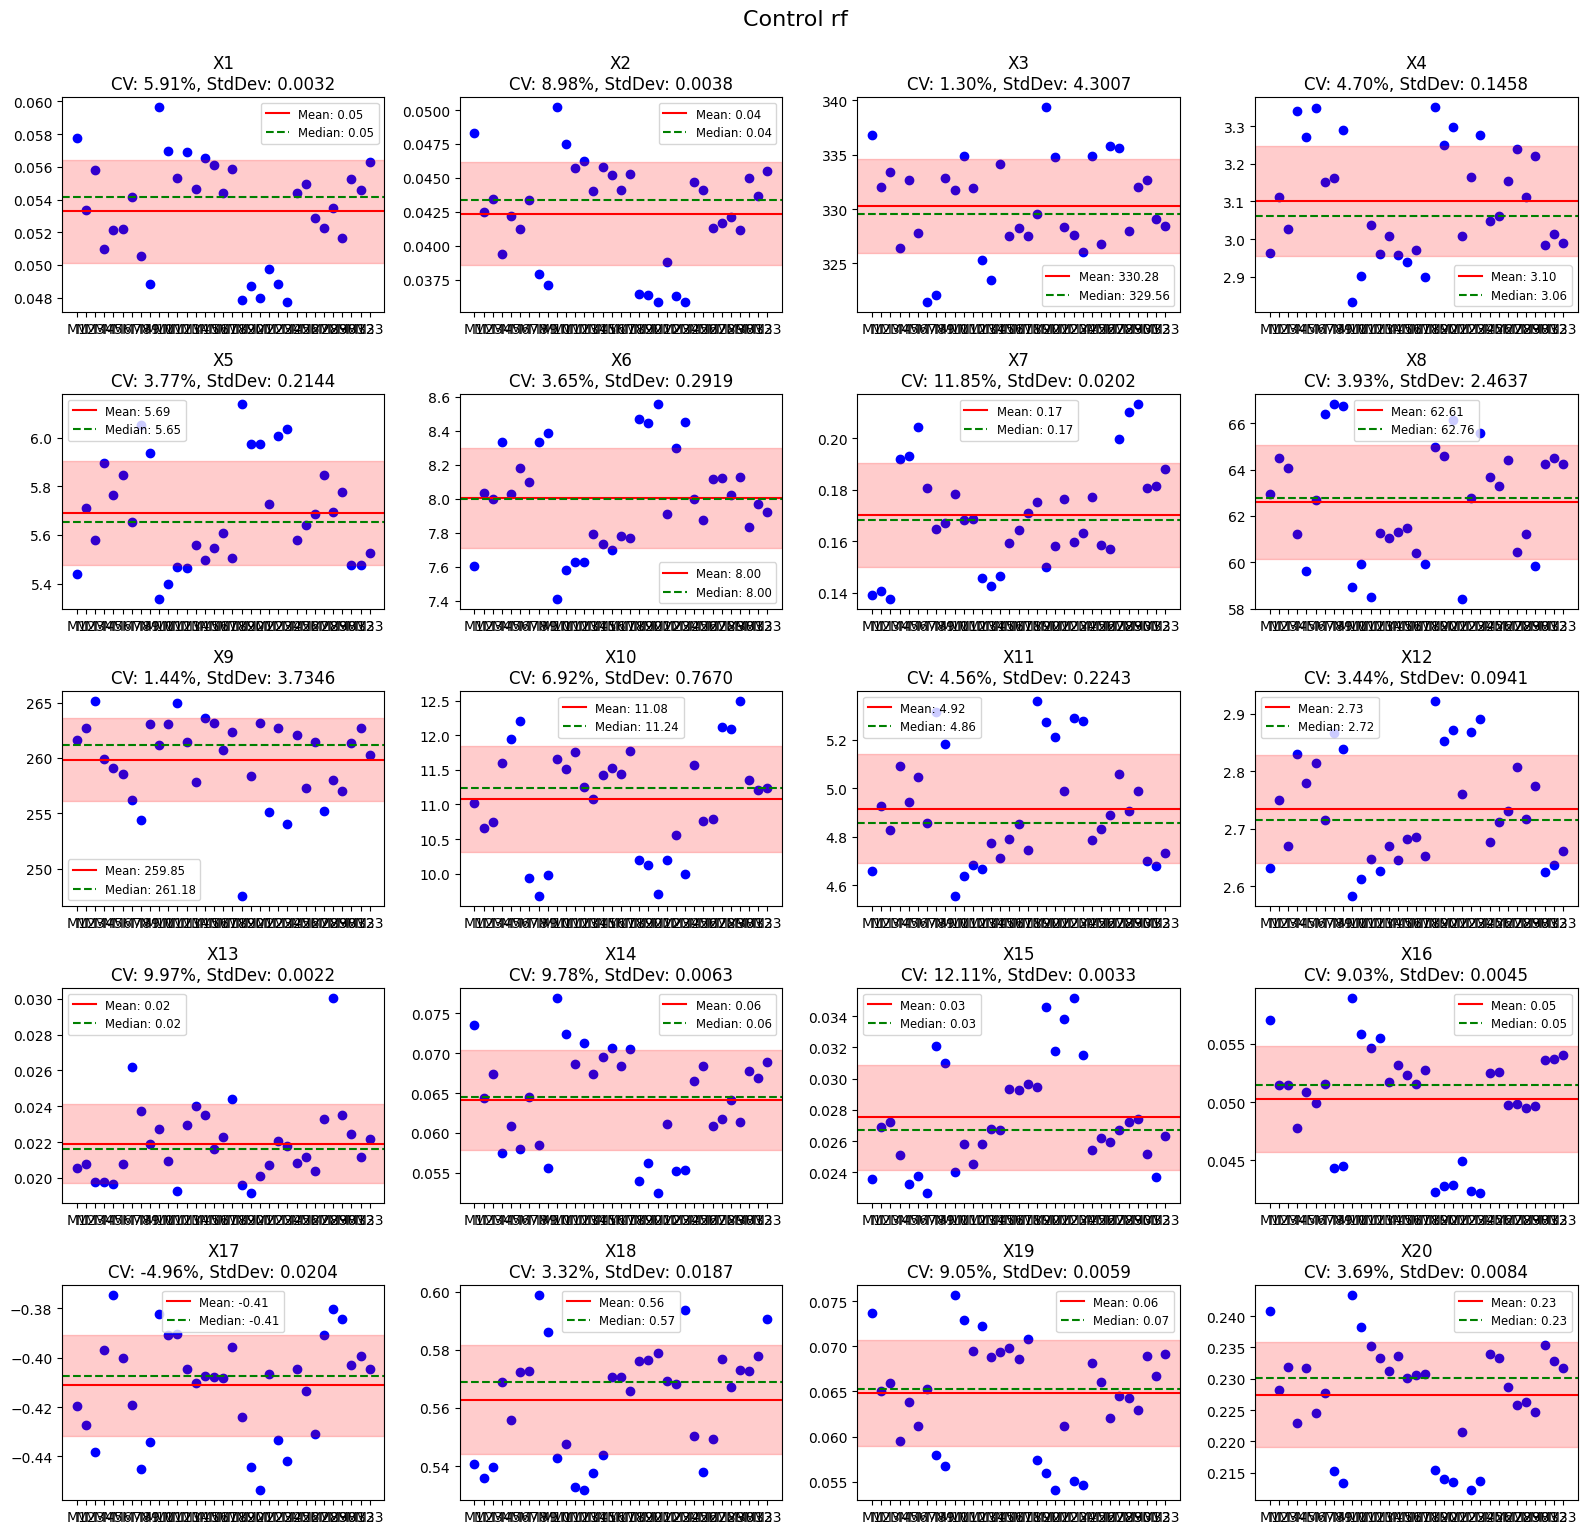

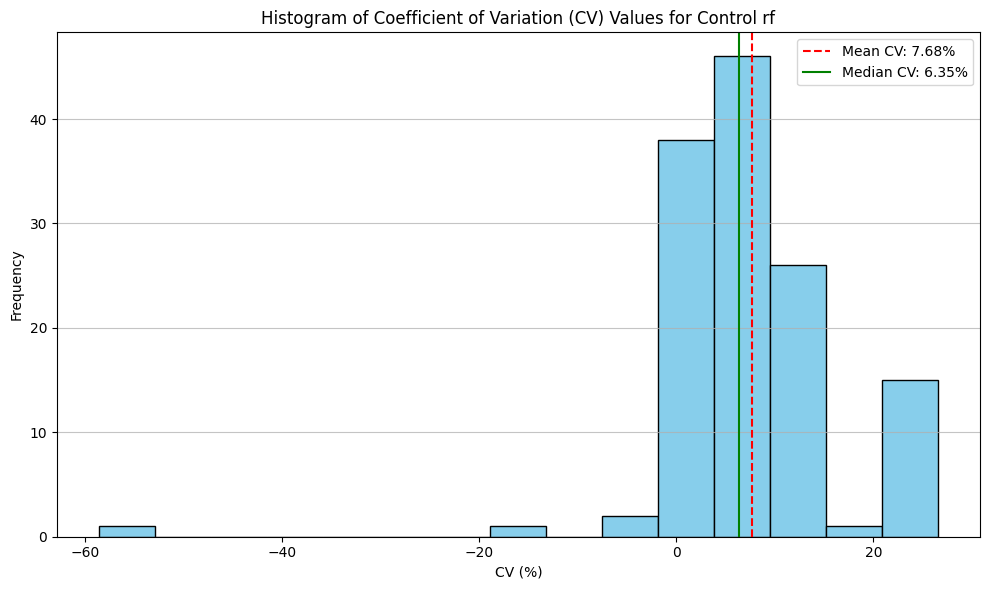

,Mean,Median,StdDev,CV(%),Min,Max,Range
X1,0.046912,0.047810,0.002644,5.635984,0.041099,0.050911,0.009812
X2,0.036431,0.037310,0.002960,8.126006,0.030566,0.040390,0.009824
X3,329.349963,328.990510,5.791627,1.758502,318.338926,341.215925,22.876999
X4,3.627243,3.631096,0.127205,3.506938,3.377821,3.821438,0.443617
X5,6.759775,6.691273,0.376093,5.563688,6.175160,7.509130,1.333970
...,...,...,...,...,...,...,...
X126,0.044847,0.045653,0.002605,5.807861,0.039683,0.048510,0.008827
X127,5.907051,5.846920,0.448561,7.593649,5.210952,6.857863,1.646911
X128,50.793535,49.614283,5.517859,10.863309,42.417000,61.435344,19.018344
X129,0.001016,0.000987,0.000236,23.259400,0.000468,0.001506,0.001037


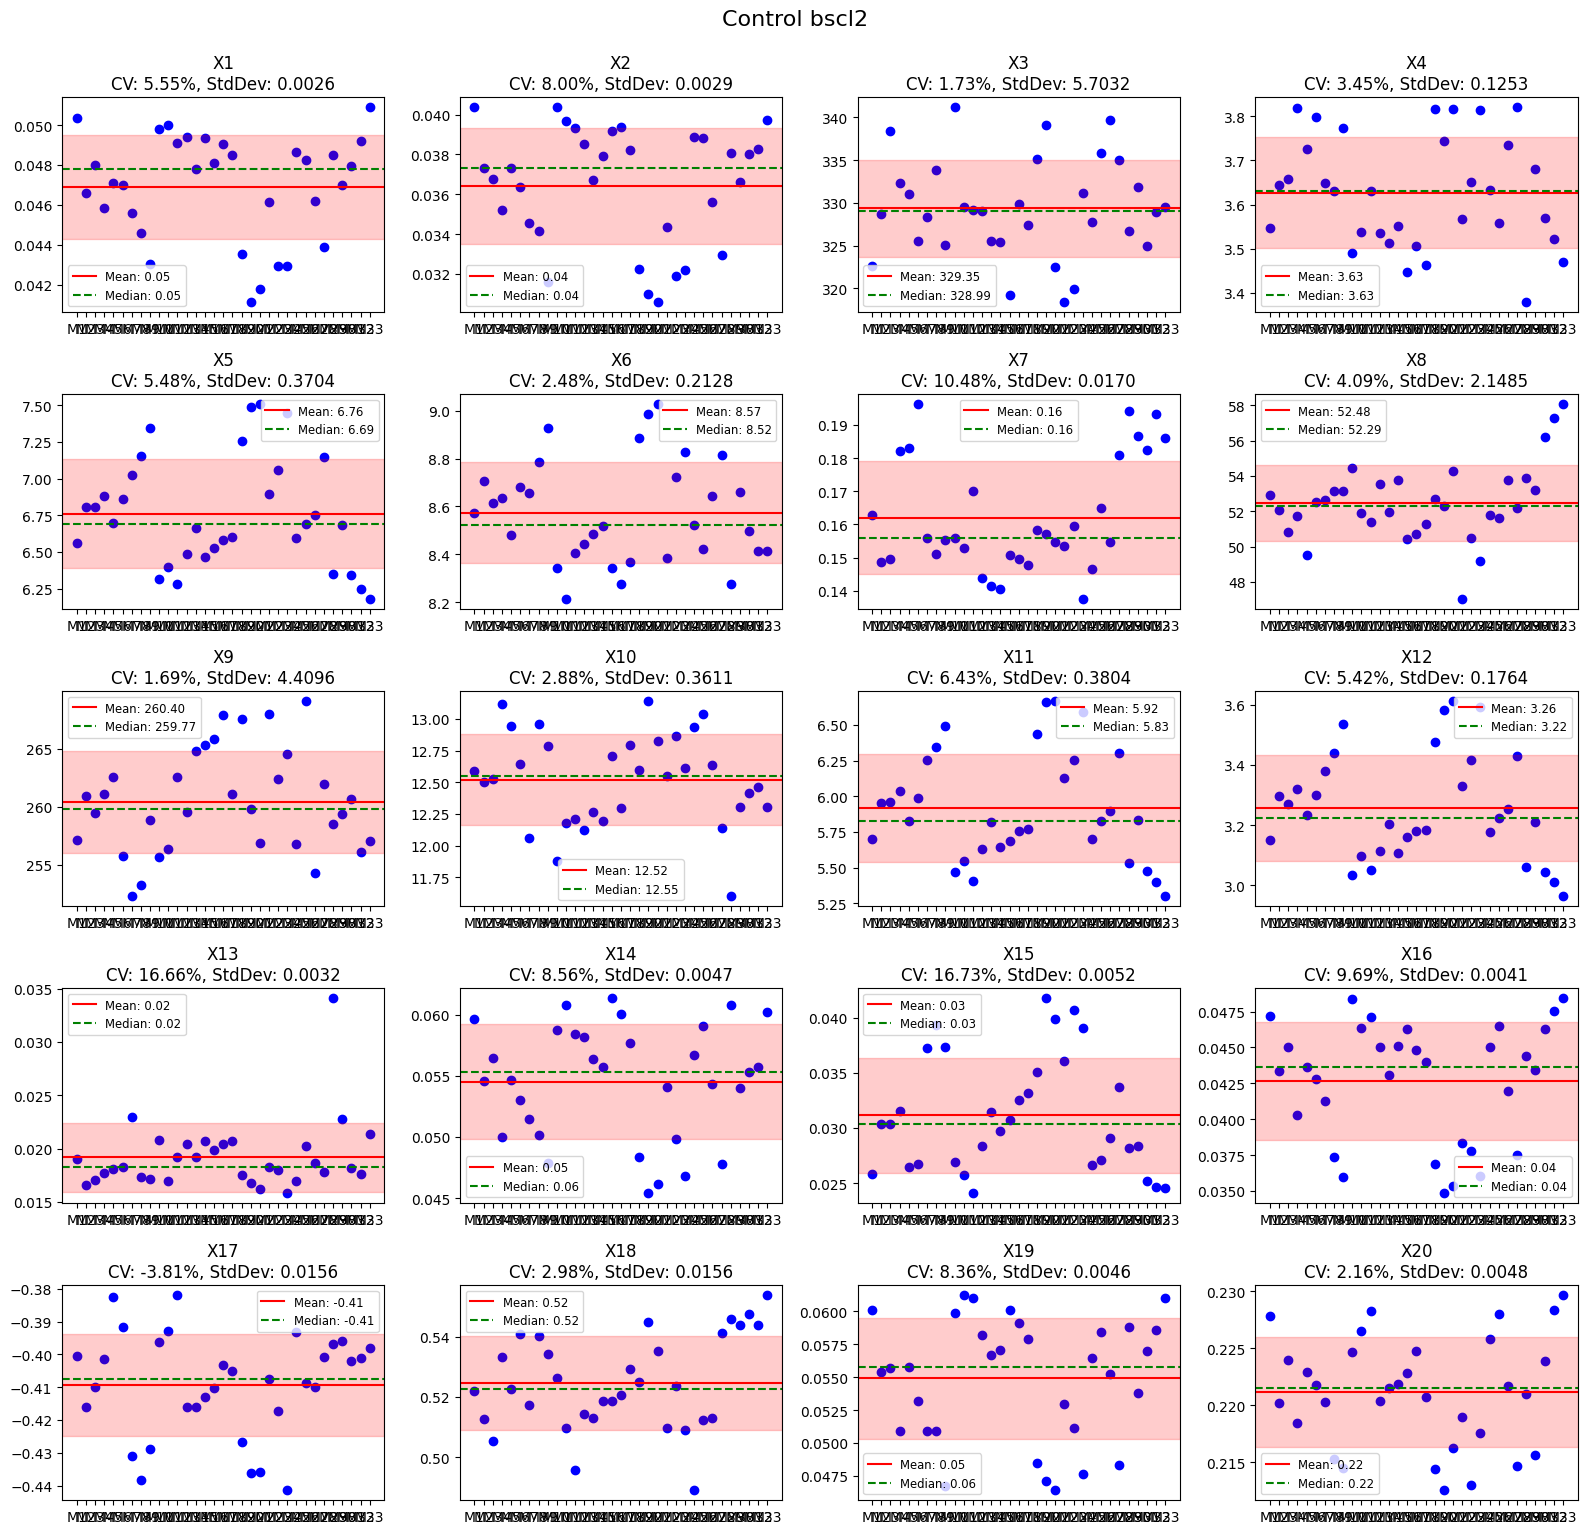

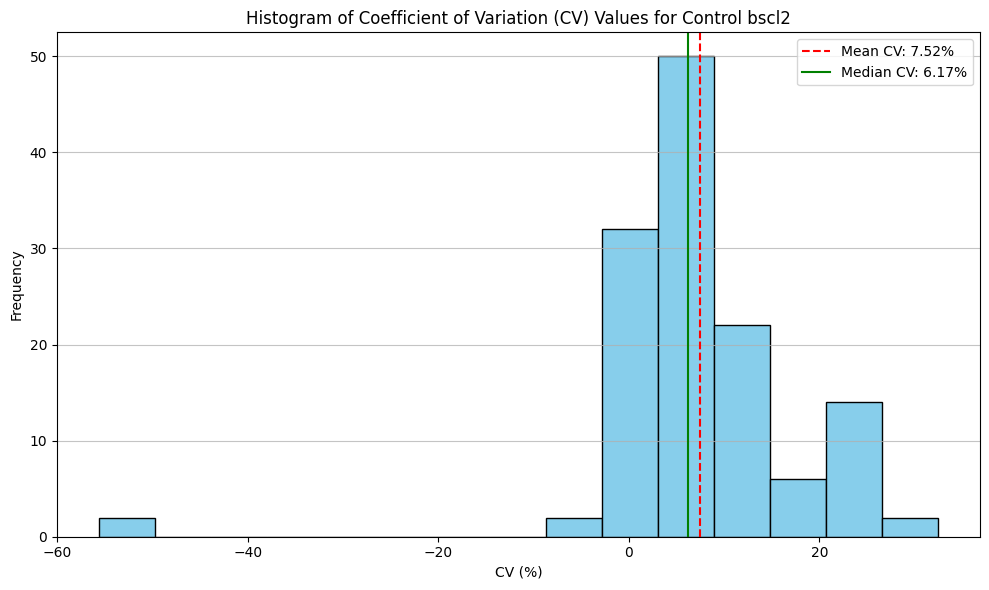

In [11]:
for control in CONTROLS:
    analyze_feature_variability(
        control_medians_df[control_medians_df["type"] == control],
        f"Control {control}",
        show_plots=True,
    )


In [12]:
# Create a correction dataframe to calculate differences from median values
correction_df = control_medians_df.copy()

# For each control type, calculate the median across all slides and sets
for control in CONTROLS:
    # Get all rows for this control type
    control_data = control_medians_df[control_medians_df["type"] == control]

    # Calculate the median for each feature across all instances of this control type
    control_feature_medians = control_data[FEATURE_COLS].median()

    # For each row of this control type, calculate the difference from the median
    for idx in control_data.index:
        # Calculate differences for feature columns only (median - slide feature values)
        for feature in FEATURE_COLS:
            correction_df.loc[idx, feature] = (
                control_feature_medians[feature] - control_medians_df.loc[idx, feature]
            )

# Display the correction dataframe
print(
    "Correction DataFrame (postive values indicate the feature value is lower than the median, add this value to the feature value to correct for the slide):"
)
correction_df


Correction DataFrame (postive values indicate the feature value is lower than the median, add this value to the feature value to correct for the slide):


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X124,X125,X126,X127,X128,X129,X130,set,slide,type
35,-0.002549,-0.003080,6.415144,0.083367,0.128325,-0.051734,-0.007001,-0.642910,2.651362,-0.037306,...,-0.001884,-0.059783,-0.001008,-0.538754,1.314342,-0.000009,-0.006623,1,1,bscl2
33,-0.003564,-0.003933,-8.658640,0.189598,0.272112,0.266892,-0.009770,-3.831760,-7.973975,0.266958,...,-0.004647,0.105712,-0.002329,-1.256516,3.022091,-0.000110,-0.010554,1,1,fit1
34,-0.003652,-0.004934,-7.226213,0.096848,0.214055,0.393642,0.029060,-0.174377,-0.473716,0.223462,...,-0.004650,0.000000,-0.003724,-0.083041,2.514726,-0.000067,-0.010198,1,1,rf
32,-0.009725,-0.013556,-15.529170,0.349591,0.533726,0.528568,0.008938,5.579775,-0.881663,-0.850033,...,-0.012600,-0.539679,-0.009253,-0.568516,6.619866,-0.000069,-0.020711,1,1,rfnotDL
27,0.001218,0.000000,0.336159,-0.013094,-0.113033,-0.183958,0.007124,0.234183,-1.132792,0.048697,...,-0.000442,-0.071055,0.000654,0.131929,-1.414476,-0.000142,-0.005317,1,2,bscl2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.003252,-0.007276,-0.294807,0.109083,0.361162,0.280791,-0.011283,2.402146,-7.338619,-0.460785,...,-0.005546,-0.147290,-0.005217,-0.404852,6.102608,-0.000334,-0.014395,11,32,rfnotDL
55,-0.003101,-0.002437,-0.535775,0.161506,0.516113,0.106131,-0.030355,-5.787623,2.768038,0.244756,...,-0.003230,-0.072334,-0.002690,-1.010943,7.197283,-0.000432,-0.001745,11,33,bscl2
53,-0.000144,0.000000,-1.159977,0.177896,0.034937,-0.227630,-0.007179,-6.624456,0.369224,0.067501,...,0.000642,-0.008384,0.000349,-1.111580,0.000000,-0.000245,0.001232,11,33,fit1
54,-0.002153,-0.002167,1.145516,0.072375,0.128211,0.074491,-0.019633,-1.475231,0.908031,0.000000,...,-0.002715,-0.342863,-0.002295,-0.273015,1.777749,-0.000387,0.001013,11,33,rf


According to Jay, we only need to focus on the deviations from the negative control (rf).


In [14]:
correction_df = correction_df[correction_df["type"] == "rf"]
# Drop the type column as it's no longer needed since we've filtered to only 'rf' type
correction_df = correction_df.drop(columns=["type"])

correction_df


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X123,X124,X125,X126,X127,X128,X129,X130,set,slide
34,-0.003652,-0.004934,-7.226213,0.096848,0.214055,0.393642,0.029060,-0.174377,-0.473716,0.223462,...,0.074151,-0.004650,0.000000,-0.003724,-0.083041,2.514726,-0.000067,-0.010198,1,1
26,0.000748,0.000867,-2.506464,-0.050420,-0.056082,-0.038416,0.027721,-1.760572,-1.499358,0.575638,...,0.091520,0.000655,0.824632,0.000420,-0.594487,-0.292598,-0.000206,0.000123,1,2
30,-0.001666,-0.000058,-3.815433,0.033069,0.074843,0.000000,0.030998,-1.324661,-3.968201,0.489492,...,0.075203,-0.001366,0.435603,-0.001027,-0.592710,0.082230,-0.000152,-0.000868,1,3
90,0.003163,0.003951,3.114701,-0.277844,-0.240920,-0.338740,-0.023717,1.543896,1.276527,-0.360243,...,-0.009155,0.002856,-0.417706,0.003216,0.367627,-1.831963,-0.000623,-0.003767,2,4
86,0.002027,0.001184,-3.126413,-0.211023,-0.109469,-0.029494,-0.024874,3.119024,2.098814,-0.703560,...,0.000000,0.000922,-0.712655,0.000896,0.848615,-0.141357,-0.000474,-0.006241,2,5
94,0.001908,0.002157,1.797565,-0.286852,-0.192795,-0.184359,-0.035943,0.058381,2.652707,-0.973280,...,-0.028346,0.001789,-0.724091,0.001847,0.846624,-1.152613,-0.000439,-0.006075,2,6
22,0.000000,0.000000,8.149276,-0.089153,0.000000,-0.102076,-0.012260,-3.653348,4.955687,1.293261,...,-0.011760,0.000000,0.666329,0.000000,-0.170784,0.822440,0.000433,-0.002607,3,7
14,0.003614,0.005426,7.484506,-0.102048,-0.398970,-0.337472,0.003677,-4.083454,6.790604,1.566409,...,-0.036289,0.005249,1.100729,0.004051,-0.847174,-4.472334,0.000274,0.010768,3,8
18,0.005278,0.006217,-3.290562,-0.228098,-0.284862,-0.389807,0.001226,-4.014364,-1.908705,1.259096,...,-0.000356,0.005326,1.213300,0.004461,-1.169345,-3.689704,0.000085,0.009943,3,9
122,-0.005536,-0.006863,-2.149155,0.229062,0.318758,0.589621,-0.010122,3.842353,0.000000,-0.412200,...,0.027299,-0.007562,-0.007255,-0.006493,0.754562,3.601457,0.000017,-0.010279,4,10


In [15]:
# Apply the correction to the original data
# For each slide and set combination in the correction_df
for idx, correction_row in correction_df.iterrows():
    slide = correction_row["slide"]
    set_val = correction_row["set"]

    # Only apply corrections to feature columns
    for feature in FEATURE_COLS:
        processed_dfs[set_val][slide][feature] += correction_row[feature]

# Display the first few rows of the corrected dataframe
print("First few rows of the corrected dataframe:")
processed_dfs[1][1].head()


First few rows of the corrected dataframe:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X128,X129,X130,type,row,col,well,set,type.f,slide
0,0.055051,0.042539,332.179050,2.911150,5.574041,7.865206,0.226104,68.580859,259.481219,11.928011,...,36.730585,0.001151,0.716585,fit1,1,1,1,1,2,1
1,0.049265,0.038180,322.788763,3.677336,6.752917,8.674440,0.192116,54.461701,266.524867,13.457767,...,50.754839,0.001049,0.732538,bscl2,1,2,2,1,1,1
2,0.054401,0.045672,320.569198,3.261465,5.769546,8.064934,0.235038,57.480210,263.520442,11.392600,...,37.899926,0.000666,0.735839,gene,1,3,3,1,3,1
3,0.061134,0.050920,327.744883,2.904662,5.293121,7.449996,0.187097,58.412309,258.864443,11.188572,...,34.058677,0.000814,0.729687,gene,1,4,4,1,3,1
4,0.057242,0.046845,331.815830,3.178480,5.409812,7.997019,0.250052,61.265590,247.546391,12.760446,...,34.215757,0.000834,0.725541,gene,1,5,5,1,3,1


In [18]:
# Save the normalized dataframes

os.makedirs("normalized_dfs", exist_ok=True)
for set_number, slides in processed_dfs.items():
    for slide_number, df in slides.items():
        df.to_csv(
            f"normalized_dfs/normalized_set_{set_number}_slide_{slide_number}.csv",
            index=False,
        )


In [32]:
all_dfs = []
for set_number, slides in processed_dfs.items():
    all_slides = []
    for slide_number, df in slides.items():
        all_slides.append(df)
    new_df = pd.concat(all_slides)
    new_df = new_df.groupby("well").agg(
        {
            **{col: "median" for col in FEATURE_COLS},
            **{col: "first" for col in METADATA_COLS if col not in ["well", "slide"]},
        }
    )
    new_df = new_df.reset_index()
    new_df = new_df[df.columns.tolist()[:-1]]

    all_dfs.append(new_df)

# Concatenate all dataframes into one
final_df = pd.concat(all_dfs)

# Sort by set and then by well
final_df = final_df.sort_values(by=["set", "well"])

final_df.to_csv("all_sets_df.csv", index=False)

# Group by well and aggregate
final_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X127,X128,X129,X130,type,row,col,well,set,type.f
0,0.055051,0.047245,321.682605,2.939174,5.319936,7.522270,0.211536,65.839753,260.480657,11.617791,...,7.262700,36.052041,0.001073,0.727550,fit1,1,1,1,1,2
1,0.049265,0.040909,325.435026,3.539080,6.568557,8.284522,0.187425,51.105077,266.524867,12.715467,...,5.821335,48.373806,0.001049,0.743585,bscl2,1,2,2,1,1
2,0.055218,0.046379,320.569198,2.976657,5.463985,7.532254,0.219743,57.480210,255.759263,11.392600,...,5.807629,35.421851,0.000583,0.732884,gene,1,3,3,1,3
3,0.055357,0.047000,329.435471,3.089948,5.523784,7.741854,0.176375,57.923093,252.266720,11.188572,...,6.939793,34.466605,0.000762,0.730650,gene,1,4,4,1,3
4,0.057242,0.046845,311.037244,2.973952,5.324209,7.917445,0.195182,59.867790,256.272250,11.673481,...,6.608697,32.977379,0.000634,0.728239,gene,1,5,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.054158,0.042895,319.207514,3.124471,5.877369,8.115256,0.175616,63.996568,259.256850,11.309813,...,7.527374,40.232375,0.000958,0.712968,gene,16,20,380,11,3
380,0.055158,0.046893,325.546096,2.888211,5.712765,7.780497,0.145543,62.850537,255.732296,10.823757,...,6.761992,38.218566,0.001080,0.718878,gene,16,21,381,11,3
381,0.054490,0.043315,340.792679,3.013017,5.486486,7.922018,0.155990,62.308939,259.999618,10.602109,...,7.170013,36.430851,0.001076,0.720525,gene,16,22,382,11,3
382,0.053326,0.043002,350.537174,3.133176,5.827786,8.134656,0.167616,64.292533,246.662565,11.272852,...,7.720281,39.507437,0.001340,0.717485,rf,16,23,383,11,4
